In [1]:
import sys, os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2
%matplotlib widget

### Data paths

In [2]:
basepath = raw_data_path + '/Imaging/mlc4'
paths = direcslist(basepath, 1)
print(len(paths))

17


### Extract data from paths

In [3]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip('/').split('/')[-2]
    dates.append(code.split('_')[0])
    lines.append(code.split('_')[1])
    # embryo_id = int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0]))
    # np.savetxt(p + '/EmbryoID.txt', [embryo_id], fmt='%i')
    embryo_ids.append(str(np.loadtxt(p + '/EmbryoID.txt').astype(int)))
print(len(set(embryo_ids)))
df = pd.DataFrame({'Path': paths, 'EmbryoID': embryo_ids, 'Line': lines, 'Date': dates})
df = df[df.Line.isin(['lp637', 'nwg240', 'nwg338', 'nwg376'])]
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/mlc4_embryos.csv')
df

17


Path    EmbryoID    Line  \
0   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651686192  nwg376   
1   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651689529  nwg376   
2   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651690158  nwg376   
3   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651691673  nwg376   
4   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651692142  nwg376   
5   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651762677   lp637   
6   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651764081   lp637   
7   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651763515   lp637   
8   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765815   lp637   
9   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765978   lp637   
10  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651766092   lp637   
11  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768045   lp637   
12  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768497   lp637   
13  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651758810  nwg376   
14  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651759099  nwg376   
15  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761419  nwg376   
16  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761965  nwg376   

      Date  
0   220504  
1   220504  
2   220504  
3   220504  
4   220504  
5   220505  
6   220505  
7   220505  
8   220505  
9   220505  
10  220505  
11  220505  
12  220505  
13  220505  
14  220505  
15  220505  
16  220505

### Segment

In [4]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)
    
#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')
    
#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()
    
#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [5]:
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.105838399548696


### Loop through embryos and quantify

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<09:46,  1.70it/s]

  1%|█▊                                                                                                                                       | 13/1000 [00:00<00:40, 24.51it/s]

  2%|███▎                                                                                                                                     | 24/1000 [00:00<00:22, 42.48it/s]

  4%|█████                                                                                                                                    | 37/1000 [00:00<00:15, 62.65it/s]

  5%|██████▌                                                                                                                                  | 48/1000 [00:01<00:12, 74.24it/s]

  6%|████████▏                                                                                                                                | 60/1000 [00:01<00:11, 84.95it/s]

  7%|█████████▊                                                                                                                               | 72/1000 [00:01<00:09, 93.18it/s]

  8%|███████████▎                                                                                                                             | 83/1000 [00:01<00:09, 93.48it/s]

  9%|████████████▉                                                                                                                            | 94/1000 [00:01<00:09, 92.81it/s]

 10%|██████████████▎                                                                                                                         | 105/1000 [00:01<00:09, 95.61it/s]

 12%|███████████████▊                                                                                                                        | 116/1000 [00:01<00:08, 99.15it/s]

 13%|█████████████████▎                                                                                                                      | 127/1000 [00:01<00:08, 99.99it/s]

 14%|██████████████████▊                                                                                                                     | 138/1000 [00:01<00:08, 99.93it/s]

 15%|████████████████████                                                                                                                   | 149/1000 [00:01<00:08, 100.29it/s]

 16%|█████████████████████▌                                                                                                                 | 160/1000 [00:02<00:08, 101.65it/s]

 17%|███████████████████████▏                                                                                                               | 172/1000 [00:02<00:07, 105.22it/s]

 18%|████████████████████████▊                                                                                                              | 184/1000 [00:02<00:07, 107.74it/s]

 20%|██████████████████████████▍                                                                                                            | 196/1000 [00:02<00:07, 109.49it/s]

 21%|████████████████████████████                                                                                                           | 208/1000 [00:02<00:07, 110.26it/s]

 22%|█████████████████████████████▋                                                                                                         | 220/1000 [00:02<00:06, 112.65it/s]

 23%|███████████████████████████████▎                                                                                                       | 232/1000 [00:02<00:06, 112.95it/s]

 24%|████████████████████████████████▉                                                                                                      | 244/1000 [00:02<00:06, 111.68it/s]

 26%|██████████████████████████████████▌                                                                                                    | 256/1000 [00:02<00:06, 112.44it/s]

 27%|████████████████████████████████████▏                                                                                                  | 268/1000 [00:03<00:07, 104.38it/s]

 28%|█████████████████████████████████████▊                                                                                                 | 280/1000 [00:03<00:06, 107.84it/s]

 29%|███████████████████████████████████████▍                                                                                               | 292/1000 [00:03<00:06, 110.77it/s]

 30%|█████████████████████████████████████████                                                                                              | 304/1000 [00:03<00:06, 111.36it/s]

 32%|██████████████████████████████████████████▋                                                                                            | 316/1000 [00:03<00:06, 111.57it/s]

 33%|████████████████████████████████████████████▎                                                                                          | 328/1000 [00:03<00:05, 112.49it/s]

 34%|█████████████████████████████████████████████▉                                                                                         | 340/1000 [00:03<00:05, 114.36it/s]

 35%|███████████████████████████████████████████████▌                                                                                       | 352/1000 [00:03<00:05, 114.84it/s]

 36%|█████████████████████████████████████████████████▏                                                                                     | 364/1000 [00:03<00:05, 114.69it/s]

 38%|██████████████████████████████████████████████████▊                                                                                    | 376/1000 [00:04<00:05, 115.44it/s]

 39%|████████████████████████████████████████████████████▌                                                                                  | 389/1000 [00:04<00:05, 117.36it/s]

 40%|██████████████████████████████████████████████████████▏                                                                                | 401/1000 [00:04<00:05, 118.01it/s]

 41%|███████████████████████████████████████████████████████▊                                                                               | 413/1000 [00:04<00:05, 116.92it/s]

 42%|█████████████████████████████████████████████████████████▍                                                                             | 425/1000 [00:04<00:04, 116.69it/s]

 44%|██████████████████████████████████████████████████████████▉                                                                            | 437/1000 [00:04<00:04, 117.15it/s]

 45%|████████████████████████████████████████████████████████████▊                                                                          | 450/1000 [00:04<00:04, 117.99it/s]

 46%|██████████████████████████████████████████████████████████████▎                                                                        | 462/1000 [00:04<00:04, 117.62it/s]

 47%|███████████████████████████████████████████████████████████████▉                                                                       | 474/1000 [00:04<00:04, 116.71it/s]

 49%|█████████████████████████████████████████████████████████████████▌                                                                     | 486/1000 [00:04<00:04, 115.98it/s]

 50%|███████████████████████████████████████████████████████████████████▏                                                                   | 498/1000 [00:05<00:04, 115.16it/s]

 51%|████████████████████████████████████████████████████████████████████▉                                                                  | 511/1000 [00:05<00:04, 116.78it/s]

 52%|██████████████████████████████████████████████████████████████████████▌                                                                | 523/1000 [00:05<00:04, 116.92it/s]

 54%|████████████████████████████████████████████████████████████████████████▏                                                              | 535/1000 [00:05<00:03, 116.58it/s]

 55%|█████████████████████████████████████████████████████████████████████████▊                                                             | 547/1000 [00:05<00:03, 116.87it/s]

 56%|███████████████████████████████████████████████████████████████████████████▍                                                           | 559/1000 [00:05<00:03, 116.79it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▏                                                         | 572/1000 [00:05<00:03, 118.05it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 584/1000 [00:05<00:03, 118.54it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▍                                                      | 596/1000 [00:05<00:03, 117.59it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████                                                     | 608/1000 [00:05<00:03, 116.66it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▋                                                   | 620/1000 [00:06<00:03, 116.21it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▎                                                 | 632/1000 [00:06<00:03, 116.83it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▉                                                | 644/1000 [00:06<00:03, 117.49it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▌                                              | 656/1000 [00:06<00:02, 117.84it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▏                                            | 668/1000 [00:06<00:02, 117.16it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▊                                           | 680/1000 [00:06<00:02, 117.10it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 693/1000 [00:06<00:02, 118.04it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 705/1000 [00:06<00:02, 118.45it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 717/1000 [00:06<00:02, 114.82it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 729/1000 [00:07<00:02, 115.19it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 741/1000 [00:07<00:02, 116.54it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 753/1000 [00:07<00:02, 117.49it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 765/1000 [00:07<00:02, 117.16it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 777/1000 [00:07<00:01, 117.38it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 789/1000 [00:07<00:01, 117.68it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 802/1000 [00:07<00:01, 118.73it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 815/1000 [00:07<00:01, 119.53it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 827/1000 [00:07<00:01, 118.11it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 839/1000 [00:07<00:01, 117.32it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 851/1000 [00:08<00:01, 117.17it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 864/1000 [00:08<00:01, 118.45it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 876/1000 [00:08<00:01, 118.34it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 888/1000 [00:08<00:00, 117.33it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 900/1000 [00:08<00:00, 117.38it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 913/1000 [00:08<00:00, 118.39it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 925/1000 [00:08<00:00, 118.85it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 937/1000 [00:08<00:00, 119.17it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 949/1000 [00:08<00:00, 117.36it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 962/1000 [00:08<00:00, 120.49it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 975/1000 [00:09<00:00, 120.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 988/1000 [00:09<00:00, 119.85it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 119.56it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.47it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:54,  1.87it/s]

  2%|██▎                                                                                                                                      | 17/1000 [00:00<00:28, 34.96it/s]

  3%|███▊                                                                                                                                     | 28/1000 [00:00<00:18, 52.07it/s]

  4%|██████                                                                                                                                   | 44/1000 [00:00<00:12, 78.11it/s]

  6%|████████▎                                                                                                                               | 61/1000 [00:00<00:09, 100.78it/s]

  8%|██████████▌                                                                                                                             | 78/1000 [00:01<00:07, 117.36it/s]

 10%|████████████▉                                                                                                                           | 95/1000 [00:01<00:06, 130.57it/s]

 11%|███████████████                                                                                                                        | 112/1000 [00:01<00:06, 140.82it/s]

 13%|█████████████████▍                                                                                                                     | 129/1000 [00:01<00:05, 147.02it/s]

 14%|███████████████████▌                                                                                                                   | 145/1000 [00:01<00:05, 148.03it/s]

 16%|█████████████████████▊                                                                                                                 | 162/1000 [00:01<00:05, 152.08it/s]

 18%|████████████████████████                                                                                                               | 178/1000 [00:01<00:05, 153.56it/s]

 20%|██████████████████████████▎                                                                                                            | 195/1000 [00:01<00:05, 155.90it/s]

 21%|████████████████████████████▍                                                                                                          | 211/1000 [00:01<00:05, 152.68it/s]

 23%|██████████████████████████████▊                                                                                                        | 228/1000 [00:01<00:04, 156.70it/s]

 24%|█████████████████████████████████                                                                                                      | 245/1000 [00:02<00:04, 158.07it/s]

 26%|███████████████████████████████████▏                                                                                                   | 261/1000 [00:02<00:04, 156.78it/s]

 28%|█████████████████████████████████████▍                                                                                                 | 277/1000 [00:02<00:04, 154.93it/s]

 29%|███████████████████████████████████████▌                                                                                               | 293/1000 [00:02<00:04, 153.25it/s]

 31%|█████████████████████████████████████████▋                                                                                             | 309/1000 [00:02<00:04, 150.92it/s]

 32%|███████████████████████████████████████████▉                                                                                           | 325/1000 [00:02<00:04, 151.24it/s]

 34%|██████████████████████████████████████████████                                                                                         | 341/1000 [00:02<00:04, 148.65it/s]

 36%|████████████████████████████████████████████████                                                                                       | 356/1000 [00:02<00:04, 148.23it/s]

 37%|██████████████████████████████████████████████████                                                                                     | 371/1000 [00:02<00:04, 147.51it/s]

 39%|████████████████████████████████████████████████████                                                                                   | 386/1000 [00:03<00:04, 144.09it/s]

 40%|██████████████████████████████████████████████████████▏                                                                                | 401/1000 [00:03<00:04, 141.99it/s]

 42%|████████████████████████████████████████████████████████▏                                                                              | 416/1000 [00:03<00:04, 142.45it/s]

 43%|██████████████████████████████████████████████████████████▏                                                                            | 431/1000 [00:03<00:03, 142.31it/s]

 45%|████████████████████████████████████████████████████████████▏                                                                          | 446/1000 [00:03<00:03, 141.84it/s]

 46%|██████████████████████████████████████████████████████████████▏                                                                        | 461/1000 [00:03<00:03, 142.93it/s]

 48%|████████████████████████████████████████████████████████████████▌                                                                      | 478/1000 [00:03<00:03, 150.18it/s]

 49%|██████████████████████████████████████████████████████████████████▋                                                                    | 494/1000 [00:03<00:03, 141.23it/s]

 51%|████████████████████████████████████████████████████████████████████▋                                                                  | 509/1000 [00:03<00:03, 140.22it/s]

 53%|███████████████████████████████████████████████████████████████████████▏                                                               | 527/1000 [00:04<00:03, 150.07it/s]

 54%|█████████████████████████████████████████████████████████████████████████▎                                                             | 543/1000 [00:04<00:03, 141.92it/s]

 56%|███████████████████████████████████████████████████████████████████████████▎                                                           | 558/1000 [00:04<00:03, 143.16it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                         | 573/1000 [00:04<00:03, 141.57it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▍                                                       | 588/1000 [00:04<00:02, 141.11it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▍                                                     | 603/1000 [00:04<00:02, 141.16it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▌                                                   | 619/1000 [00:04<00:02, 145.32it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▋                                                 | 635/1000 [00:04<00:02, 147.44it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▊                                               | 650/1000 [00:04<00:02, 144.99it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████▉                                             | 666/1000 [00:04<00:02, 148.90it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▉                                           | 681/1000 [00:05<00:02, 146.45it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 696/1000 [00:05<00:02, 145.54it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 711/1000 [00:05<00:02, 144.20it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████                                     | 726/1000 [00:05<00:01, 138.84it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 742/1000 [00:05<00:01, 143.82it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 758/1000 [00:05<00:01, 146.57it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 773/1000 [00:05<00:01, 144.65it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 788/1000 [00:05<00:01, 143.26it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 803/1000 [00:05<00:01, 141.18it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 820/1000 [00:06<00:01, 147.24it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 836/1000 [00:06<00:01, 149.48it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 852/1000 [00:06<00:00, 152.06it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 869/1000 [00:06<00:00, 154.68it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 886/1000 [00:06<00:00, 158.52it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 902/1000 [00:06<00:00, 155.53it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 918/1000 [00:06<00:00, 153.52it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 935/1000 [00:06<00:00, 157.44it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 951/1000 [00:06<00:00, 153.09it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 967/1000 [00:07<00:00, 152.29it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 983/1000 [00:07<00:00, 150.74it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:07<00:00, 148.91it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.08it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<10:26,  1.59it/s]

  2%|██▋                                                                                                                                      | 20/1000 [00:00<00:26, 36.32it/s]

  4%|█████▌                                                                                                                                   | 41/1000 [00:00<00:13, 72.05it/s]

  6%|████████                                                                                                                                 | 59/1000 [00:00<00:09, 96.57it/s]

  8%|██████████▌                                                                                                                             | 78/1000 [00:01<00:07, 118.98it/s]

 10%|█████████████                                                                                                                           | 96/1000 [00:01<00:06, 133.95it/s]

 11%|███████████████▍                                                                                                                       | 114/1000 [00:01<00:06, 140.19it/s]

 14%|██████████████████▎                                                                                                                    | 136/1000 [00:01<00:05, 159.86it/s]

 16%|█████████████████████▎                                                                                                                 | 158/1000 [00:01<00:04, 173.84it/s]

 18%|███████████████████████▉                                                                                                               | 177/1000 [00:01<00:04, 165.70it/s]

 20%|██████████████████████████▎                                                                                                            | 195/1000 [00:01<00:04, 167.91it/s]

 22%|█████████████████████████████                                                                                                          | 215/1000 [00:01<00:04, 175.82it/s]

 24%|███████████████████████████████▉                                                                                                       | 237/1000 [00:01<00:04, 187.00it/s]

 26%|██████████████████████████████████▋                                                                                                    | 257/1000 [00:02<00:04, 173.62it/s]

 28%|█████████████████████████████████████▍                                                                                                 | 277/1000 [00:02<00:04, 178.55it/s]

 30%|███████████████████████████████████████▉                                                                                               | 296/1000 [00:02<00:03, 178.65it/s]

 32%|██████████████████████████████████████████▌                                                                                            | 315/1000 [00:02<00:03, 177.96it/s]

 33%|████████████████████████████████████████████▉                                                                                          | 333/1000 [00:02<00:03, 178.53it/s]

 35%|███████████████████████████████████████████████▌                                                                                       | 352/1000 [00:02<00:03, 179.50it/s]

 37%|██████████████████████████████████████████████████                                                                                     | 371/1000 [00:02<00:03, 179.39it/s]

 39%|████████████████████████████████████████████████████▋                                                                                  | 390/1000 [00:02<00:03, 178.85it/s]

 41%|███████████████████████████████████████████████████████▏                                                                               | 409/1000 [00:02<00:03, 180.70it/s]

 43%|██████████████████████████████████████████████████████████▏                                                                            | 431/1000 [00:02<00:02, 189.70it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                          | 451/1000 [00:03<00:02, 190.32it/s]

 47%|███████████████████████████████████████████████████████████████▌                                                                       | 471/1000 [00:03<00:02, 190.19it/s]

 49%|██████████████████████████████████████████████████████████████████▎                                                                    | 491/1000 [00:03<00:02, 190.79it/s]

 51%|████████████████████████████████████████████████████████████████████▉                                                                  | 511/1000 [00:03<00:02, 187.78it/s]

 53%|███████████████████████████████████████████████████████████████████████▋                                                               | 531/1000 [00:03<00:02, 189.13it/s]

 55%|██████████████████████████████████████████████████████████████████████████▎                                                            | 550/1000 [00:03<00:02, 188.74it/s]

 57%|████████████████████████████████████████████████████████████████████████████▉                                                          | 570/1000 [00:03<00:02, 188.27it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▉                                                       | 592/1000 [00:03<00:02, 195.79it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▊                                                    | 613/1000 [00:03<00:01, 199.13it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▍                                                 | 633/1000 [00:04<00:01, 199.01it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▎                                              | 654/1000 [00:04<00:01, 200.74it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▎                                           | 676/1000 [00:04<00:01, 204.57it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████                                         | 697/1000 [00:04<00:01, 199.80it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 718/1000 [00:04<00:01, 195.47it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 740/1000 [00:04<00:01, 201.11it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 761/1000 [00:04<00:01, 202.09it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 782/1000 [00:04<00:01, 200.72it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 803/1000 [00:04<00:01, 196.85it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 823/1000 [00:04<00:00, 191.95it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 843/1000 [00:05<00:00, 189.40it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 862/1000 [00:05<00:00, 188.69it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 881/1000 [00:05<00:00, 185.38it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 900/1000 [00:05<00:00, 184.73it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 920/1000 [00:05<00:00, 187.09it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 942/1000 [00:05<00:00, 194.37it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 962/1000 [00:05<00:00, 190.19it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 982/1000 [00:05<00:00, 170.31it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.45it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.21it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<07:00,  2.37it/s]

  2%|██▋                                                                                                                                      | 20/1000 [00:00<00:19, 49.24it/s]

  4%|█████▍                                                                                                                                   | 40/1000 [00:00<00:10, 88.06it/s]

  6%|████████▎                                                                                                                               | 61/1000 [00:00<00:07, 120.34it/s]

  8%|██████████▋                                                                                                                             | 79/1000 [00:00<00:06, 135.68it/s]

 10%|█████████████▏                                                                                                                          | 97/1000 [00:00<00:06, 145.04it/s]

 12%|███████████████▉                                                                                                                       | 118/1000 [00:01<00:05, 161.58it/s]

 14%|██████████████████▍                                                                                                                    | 137/1000 [00:01<00:05, 167.99it/s]

 16%|█████████████████████▎                                                                                                                 | 158/1000 [00:01<00:04, 178.31it/s]

 18%|████████████████████████▏                                                                                                              | 179/1000 [00:01<00:04, 185.89it/s]

 20%|██████████████████████████▊                                                                                                            | 199/1000 [00:01<00:04, 184.87it/s]

 22%|█████████████████████████████▍                                                                                                         | 218/1000 [00:01<00:04, 182.17it/s]

 24%|███████████████████████████████▉                                                                                                       | 237/1000 [00:01<00:04, 181.12it/s]

 26%|██████████████████████████████████▉                                                                                                    | 259/1000 [00:01<00:03, 189.98it/s]

 28%|█████████████████████████████████████▋                                                                                                 | 279/1000 [00:01<00:03, 192.12it/s]

 30%|████████████████████████████████████████▋                                                                                              | 301/1000 [00:01<00:03, 197.89it/s]

 32%|███████████████████████████████████████████▍                                                                                           | 322/1000 [00:02<00:03, 198.43it/s]

 34%|██████████████████████████████████████████████▏                                                                                        | 342/1000 [00:02<00:03, 192.93it/s]

 36%|████████████████████████████████████████████████▊                                                                                      | 362/1000 [00:02<00:03, 191.39it/s]

 38%|███████████████████████████████████████████████████▊                                                                                   | 384/1000 [00:02<00:03, 197.62it/s]

 40%|██████████████████████████████████████████████████████▌                                                                                | 404/1000 [00:02<00:03, 196.67it/s]

 42%|█████████████████████████████████████████████████████████▏                                                                             | 424/1000 [00:02<00:03, 189.72it/s]

 44%|███████████████████████████████████████████████████████████▉                                                                           | 444/1000 [00:02<00:03, 184.98it/s]

 46%|██████████████████████████████████████████████████████████████▌                                                                        | 463/1000 [00:02<00:02, 181.41it/s]

 48%|█████████████████████████████████████████████████████████████████                                                                      | 482/1000 [00:02<00:02, 180.91it/s]

 50%|███████████████████████████████████████████████████████████████████▋                                                                   | 501/1000 [00:03<00:02, 180.84it/s]

 52%|██████████████████████████████████████████████████████████████████████▎                                                                | 521/1000 [00:03<00:02, 184.54it/s]

 54%|████████████████████████████████████████████████████████████████████████▉                                                              | 540/1000 [00:03<00:02, 178.56it/s]

 56%|███████████████████████████████████████████████████████████████████████████▌                                                           | 560/1000 [00:03<00:02, 183.90it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▎                                                        | 580/1000 [00:03<00:02, 186.64it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▊                                                      | 599/1000 [00:03<00:02, 187.30it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▌                                                   | 619/1000 [00:03<00:02, 189.38it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▍                                                | 640/1000 [00:03<00:01, 194.73it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████                                              | 660/1000 [00:03<00:01, 191.13it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▊                                           | 680/1000 [00:04<00:01, 188.54it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 699/1000 [00:04<00:01, 184.86it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 721/1000 [00:04<00:01, 192.37it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 741/1000 [00:04<00:01, 187.95it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 760/1000 [00:04<00:01, 185.99it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 779/1000 [00:04<00:01, 185.14it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 799/1000 [00:04<00:01, 188.01it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 820/1000 [00:04<00:00, 193.08it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 840/1000 [00:04<00:00, 194.58it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 860/1000 [00:04<00:00, 188.02it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 879/1000 [00:05<00:00, 184.63it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 900/1000 [00:05<00:00, 188.69it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 919/1000 [00:05<00:00, 185.46it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 938/1000 [00:05<00:00, 182.02it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 957/1000 [00:05<00:00, 181.20it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 977/1000 [00:05<00:00, 184.56it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:05<00:00, 191.02it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.80it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:48,  1.89it/s]

  2%|██▍                                                                                                                                      | 18/1000 [00:00<00:26, 37.61it/s]

  3%|████▋                                                                                                                                    | 34/1000 [00:00<00:14, 65.53it/s]

  5%|██████▊                                                                                                                                  | 50/1000 [00:00<00:10, 88.46it/s]

  6%|████████▊                                                                                                                               | 65/1000 [00:00<00:08, 104.28it/s]

  8%|███████████                                                                                                                             | 81/1000 [00:01<00:07, 118.91it/s]

 10%|█████████████▏                                                                                                                          | 97/1000 [00:01<00:06, 129.27it/s]

 11%|███████████████▎                                                                                                                       | 113/1000 [00:01<00:06, 137.32it/s]

 13%|█████████████████▋                                                                                                                     | 131/1000 [00:01<00:05, 147.83it/s]

 15%|███████████████████▊                                                                                                                   | 147/1000 [00:01<00:05, 150.31it/s]

 16%|██████████████████████                                                                                                                 | 163/1000 [00:01<00:05, 153.00it/s]

 18%|████████████████████████▌                                                                                                              | 182/1000 [00:01<00:05, 161.91it/s]

 20%|██████████████████████████▊                                                                                                            | 199/1000 [00:01<00:04, 161.22it/s]

 22%|█████████████████████████████▏                                                                                                         | 216/1000 [00:01<00:05, 154.59it/s]

 23%|███████████████████████████████▎                                                                                                       | 232/1000 [00:01<00:04, 154.57it/s]

 25%|█████████████████████████████████▌                                                                                                     | 249/1000 [00:02<00:04, 156.79it/s]

 27%|███████████████████████████████████▉                                                                                                   | 266/1000 [00:02<00:04, 158.77it/s]

 28%|██████████████████████████████████████▏                                                                                                | 283/1000 [00:02<00:04, 160.63it/s]

 30%|████████████████████████████████████████▌                                                                                              | 300/1000 [00:02<00:04, 162.17it/s]

 32%|██████████████████████████████████████████▊                                                                                            | 317/1000 [00:02<00:04, 163.66it/s]

 33%|█████████████████████████████████████████████                                                                                          | 334/1000 [00:02<00:04, 162.20it/s]

 35%|███████████████████████████████████████████████▍                                                                                       | 351/1000 [00:02<00:04, 160.90it/s]

 37%|█████████████████████████████████████████████████▋                                                                                     | 368/1000 [00:02<00:03, 160.10it/s]

 38%|███████████████████████████████████████████████████▉                                                                                   | 385/1000 [00:02<00:03, 157.07it/s]

 40%|██████████████████████████████████████████████████████▏                                                                                | 401/1000 [00:03<00:03, 156.66it/s]

 42%|████████████████████████████████████████████████████████▎                                                                              | 417/1000 [00:03<00:03, 156.89it/s]

 43%|██████████████████████████████████████████████████████████▍                                                                            | 433/1000 [00:03<00:03, 156.71it/s]

 45%|████████████████████████████████████████████████████████████▌                                                                          | 449/1000 [00:03<00:03, 156.64it/s]

 46%|██████████████████████████████████████████████████████████████▊                                                                        | 465/1000 [00:03<00:03, 153.24it/s]

 48%|████████████████████████████████████████████████████████████████▉                                                                      | 481/1000 [00:03<00:03, 149.15it/s]

 50%|███████████████████████████████████████████████████████████████████                                                                    | 497/1000 [00:03<00:03, 152.08it/s]

 51%|█████████████████████████████████████████████████████████████████████▎                                                                 | 513/1000 [00:03<00:03, 153.25it/s]

 53%|███████████████████████████████████████████████████████████████████████▌                                                               | 530/1000 [00:03<00:03, 155.76it/s]

 55%|█████████████████████████████████████████████████████████████████████████▋                                                             | 546/1000 [00:03<00:02, 153.53it/s]

 56%|███████████████████████████████████████████████████████████████████████████▊                                                           | 562/1000 [00:04<00:02, 154.73it/s]

 58%|██████████████████████████████████████████████████████████████████████████████                                                         | 578/1000 [00:04<00:02, 155.26it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▏                                                      | 594/1000 [00:04<00:02, 155.50it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▎                                                    | 610/1000 [00:04<00:02, 156.22it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▌                                                  | 626/1000 [00:04<00:02, 156.03it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▋                                                | 642/1000 [00:04<00:02, 153.47it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▊                                              | 658/1000 [00:04<00:02, 149.05it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▉                                            | 674/1000 [00:04<00:02, 151.72it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 690/1000 [00:04<00:02, 152.81it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 707/1000 [00:05<00:01, 156.72it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 724/1000 [00:05<00:01, 158.66it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 741/1000 [00:05<00:01, 160.66it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 758/1000 [00:05<00:01, 162.69it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 775/1000 [00:05<00:01, 161.77it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 794/1000 [00:05<00:01, 168.05it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 813/1000 [00:05<00:01, 173.56it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 831/1000 [00:05<00:00, 173.93it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 849/1000 [00:05<00:00, 175.55it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 868/1000 [00:05<00:00, 179.72it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 888/1000 [00:06<00:00, 183.05it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 907/1000 [00:06<00:00, 180.34it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 926/1000 [00:06<00:00, 167.08it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 945/1000 [00:06<00:00, 172.64it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 965/1000 [00:06<00:00, 177.97it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 984/1000 [00:06<00:00, 178.94it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.49it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:29,  1.96it/s]

  2%|██▌                                                                                                                                      | 19/1000 [00:00<00:23, 40.90it/s]

  4%|█████                                                                                                                                    | 37/1000 [00:00<00:13, 73.92it/s]

  5%|███████▍                                                                                                                                 | 54/1000 [00:00<00:09, 98.06it/s]

  7%|█████████▉                                                                                                                              | 73/1000 [00:00<00:07, 120.84it/s]

  9%|████████████▍                                                                                                                           | 91/1000 [00:01<00:06, 136.33it/s]

 11%|██████████████▊                                                                                                                        | 110/1000 [00:01<00:05, 150.21it/s]

 13%|█████████████████▍                                                                                                                     | 129/1000 [00:01<00:05, 159.77it/s]

 15%|███████████████████▉                                                                                                                   | 148/1000 [00:01<00:05, 167.46it/s]

 17%|██████████████████████▌                                                                                                                | 167/1000 [00:01<00:04, 173.57it/s]

 19%|█████████████████████████                                                                                                              | 186/1000 [00:01<00:04, 175.68it/s]

 20%|███████████████████████████▋                                                                                                           | 205/1000 [00:01<00:04, 178.37it/s]

 22%|██████████████████████████████▏                                                                                                        | 224/1000 [00:01<00:04, 178.74it/s]

 24%|████████████████████████████████▊                                                                                                      | 243/1000 [00:01<00:04, 176.67it/s]

 26%|███████████████████████████████████▏                                                                                                   | 261/1000 [00:01<00:04, 177.07it/s]

 28%|█████████████████████████████████████▋                                                                                                 | 279/1000 [00:02<00:04, 167.67it/s]

 30%|███████████████████████████████████████▉                                                                                               | 296/1000 [00:02<00:04, 163.37it/s]

 32%|██████████████████████████████████████████▌                                                                                            | 315/1000 [00:02<00:04, 168.40it/s]

 33%|█████████████████████████████████████████████                                                                                          | 334/1000 [00:02<00:03, 171.97it/s]

 35%|███████████████████████████████████████████████▌                                                                                       | 352/1000 [00:02<00:03, 173.84it/s]

 37%|██████████████████████████████████████████████████                                                                                     | 371/1000 [00:02<00:03, 177.08it/s]

 39%|████████████████████████████████████████████████████▋                                                                                  | 390/1000 [00:02<00:03, 179.37it/s]

 41%|███████████████████████████████████████████████████████▏                                                                               | 409/1000 [00:02<00:03, 181.50it/s]

 43%|█████████████████████████████████████████████████████████▊                                                                             | 428/1000 [00:02<00:03, 180.54it/s]

 45%|████████████████████████████████████████████████████████████▎                                                                          | 447/1000 [00:03<00:03, 182.21it/s]

 47%|██████████████████████████████████████████████████████████████▉                                                                        | 466/1000 [00:03<00:02, 182.88it/s]

 48%|█████████████████████████████████████████████████████████████████▍                                                                     | 485/1000 [00:03<00:02, 184.04it/s]

 50%|████████████████████████████████████████████████████████████████████                                                                   | 504/1000 [00:03<00:02, 184.24it/s]

 52%|██████████████████████████████████████████████████████████████████████▌                                                                | 523/1000 [00:03<00:02, 184.94it/s]

 54%|█████████████████████████████████████████████████████████████████████████▏                                                             | 542/1000 [00:03<00:02, 184.02it/s]

 56%|███████████████████████████████████████████████████████████████████████████▋                                                           | 561/1000 [00:03<00:02, 183.29it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▎                                                        | 580/1000 [00:03<00:02, 183.26it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▊                                                      | 599/1000 [00:03<00:02, 179.50it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▍                                                   | 618/1000 [00:03<00:02, 180.25it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▉                                                 | 637/1000 [00:04<00:02, 180.40it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▌                                              | 656/1000 [00:04<00:01, 182.31it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▏                                           | 675/1000 [00:04<00:01, 181.62it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 694/1000 [00:04<00:01, 181.78it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 713/1000 [00:04<00:01, 182.17it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 732/1000 [00:04<00:01, 181.45it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 751/1000 [00:04<00:01, 181.36it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 770/1000 [00:04<00:01, 182.09it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 789/1000 [00:04<00:01, 178.20it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 808/1000 [00:05<00:01, 179.16it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 826/1000 [00:05<00:00, 179.19it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 845/1000 [00:05<00:00, 181.37it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 864/1000 [00:05<00:00, 182.94it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 883/1000 [00:05<00:00, 183.04it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 902/1000 [00:05<00:00, 168.59it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 920/1000 [00:05<00:00, 171.00it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 939/1000 [00:05<00:00, 174.12it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 957/1000 [00:05<00:00, 168.69it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 976/1000 [00:05<00:00, 174.04it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 994/1000 [00:06<00:00, 173.82it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.82it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<09:32,  1.74it/s]

  1%|█▋                                                                                                                                       | 12/1000 [00:00<00:42, 23.03it/s]

  2%|███▎                                                                                                                                     | 24/1000 [00:00<00:22, 43.40it/s]

  3%|████▋                                                                                                                                    | 34/1000 [00:00<00:17, 56.12it/s]

  4%|██████▏                                                                                                                                  | 45/1000 [00:00<00:13, 68.81it/s]

  6%|███████▌                                                                                                                                 | 55/1000 [00:01<00:12, 76.42it/s]

  7%|█████████                                                                                                                                | 66/1000 [00:01<00:11, 83.32it/s]

  8%|██████████▌                                                                                                                              | 77/1000 [00:01<00:10, 88.28it/s]

  9%|████████████                                                                                                                             | 88/1000 [00:01<00:09, 92.06it/s]

 10%|█████████████▌                                                                                                                           | 99/1000 [00:01<00:09, 94.74it/s]

 11%|██████████████▊                                                                                                                         | 109/1000 [00:01<00:09, 96.14it/s]

 12%|████████████████▎                                                                                                                       | 120/1000 [00:01<00:09, 97.54it/s]

 13%|█████████████████▊                                                                                                                      | 131/1000 [00:01<00:08, 98.25it/s]

 14%|███████████████████▏                                                                                                                    | 141/1000 [00:01<00:08, 97.52it/s]

 15%|████████████████████▋                                                                                                                  | 153/1000 [00:02<00:08, 102.46it/s]

 16%|██████████████████████▏                                                                                                                | 164/1000 [00:02<00:08, 101.14it/s]

 18%|███████████████████████▋                                                                                                               | 175/1000 [00:02<00:08, 100.65it/s]

 19%|█████████████████████████                                                                                                              | 186/1000 [00:02<00:08, 101.01it/s]

 20%|██████████████████████████▌                                                                                                            | 197/1000 [00:02<00:07, 100.98it/s]

 21%|████████████████████████████                                                                                                           | 208/1000 [00:02<00:07, 100.09it/s]

 22%|█████████████████████████████▌                                                                                                         | 219/1000 [00:02<00:07, 100.64it/s]

 23%|███████████████████████████████                                                                                                        | 230/1000 [00:02<00:07, 100.34it/s]

 24%|████████████████████████████████▊                                                                                                       | 241/1000 [00:02<00:07, 99.71it/s]

 25%|██████████████████████████████████                                                                                                     | 252/1000 [00:03<00:07, 102.39it/s]

 26%|███████████████████████████████████▌                                                                                                   | 263/1000 [00:03<00:07, 101.70it/s]

 27%|████████████████████████████████████▉                                                                                                  | 274/1000 [00:03<00:07, 101.21it/s]

 28%|██████████████████████████████████████▍                                                                                                | 285/1000 [00:03<00:07, 100.58it/s]

 30%|███████████████████████████████████████▉                                                                                               | 296/1000 [00:03<00:07, 100.42it/s]

 31%|█████████████████████████████████████████▊                                                                                              | 307/1000 [00:03<00:07, 98.27it/s]

 32%|███████████████████████████████████████████                                                                                             | 317/1000 [00:03<00:07, 97.37it/s]

 33%|████████████████████████████████████████████▍                                                                                           | 327/1000 [00:03<00:06, 97.65it/s]

 34%|█████████████████████████████████████████████▊                                                                                          | 337/1000 [00:03<00:06, 97.43it/s]

 35%|███████████████████████████████████████████████▎                                                                                        | 348/1000 [00:04<00:06, 97.81it/s]

 36%|████████████████████████████████████████████████▋                                                                                       | 358/1000 [00:04<00:06, 97.33it/s]

 37%|██████████████████████████████████████████████████▏                                                                                     | 369/1000 [00:04<00:06, 98.68it/s]

 38%|███████████████████████████████████████████████████▌                                                                                    | 379/1000 [00:04<00:06, 98.33it/s]

 39%|████████████████████████████████████████████████████▉                                                                                   | 389/1000 [00:04<00:06, 98.57it/s]

 40%|██████████████████████████████████████████████████████▎                                                                                 | 399/1000 [00:04<00:06, 97.95it/s]

 41%|███████████████████████████████████████████████████████▌                                                                                | 409/1000 [00:04<00:06, 97.62it/s]

 42%|████████████████████████████████████████████████████████▉                                                                               | 419/1000 [00:04<00:05, 98.19it/s]

 43%|██████████████████████████████████████████████████████████▎                                                                             | 429/1000 [00:04<00:05, 98.22it/s]

 44%|███████████████████████████████████████████████████████████▋                                                                            | 439/1000 [00:04<00:05, 96.74it/s]

 45%|█████████████████████████████████████████████████████████████                                                                           | 449/1000 [00:05<00:05, 93.96it/s]

 46%|██████████████████████████████████████████████████████████████▍                                                                         | 459/1000 [00:05<00:05, 93.54it/s]

 47%|███████████████████████████████████████████████████████████████▊                                                                        | 469/1000 [00:05<00:05, 94.50it/s]

 48%|█████████████████████████████████████████████████████████████████▏                                                                      | 479/1000 [00:05<00:05, 95.19it/s]

 49%|██████████████████████████████████████████████████████████████████▌                                                                     | 489/1000 [00:05<00:05, 93.20it/s]

 50%|███████████████████████████████████████████████████████████████████▊                                                                    | 499/1000 [00:05<00:05, 93.42it/s]

 51%|█████████████████████████████████████████████████████████████████████▏                                                                  | 509/1000 [00:05<00:05, 95.30it/s]

 52%|██████████████████████████████████████████████████████████████████████▋                                                                 | 520/1000 [00:05<00:04, 96.92it/s]

 53%|████████████████████████████████████████████████████████████████████████                                                                | 530/1000 [00:05<00:04, 97.60it/s]

 54%|█████████████████████████████████████████████████████████████████████████▌                                                              | 541/1000 [00:06<00:04, 98.68it/s]

 55%|██████████████████████████████████████████████████████████████████████████▉                                                             | 551/1000 [00:06<00:04, 95.65it/s]

 56%|████████████████████████████████████████████████████████████████████████████▎                                                           | 561/1000 [00:06<00:04, 92.20it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 571/1000 [00:06<00:04, 92.75it/s]

 58%|███████████████████████████████████████████████████████████████████████████████                                                         | 581/1000 [00:06<00:04, 92.43it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▍                                                       | 591/1000 [00:06<00:04, 92.32it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▋                                                      | 601/1000 [00:06<00:04, 87.71it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▉                                                     | 610/1000 [00:06<00:04, 87.91it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▎                                                   | 620/1000 [00:06<00:04, 90.18it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▋                                                  | 630/1000 [00:07<00:04, 90.25it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                 | 640/1000 [00:07<00:04, 89.50it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▍                                               | 650/1000 [00:07<00:03, 90.82it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▊                                              | 660/1000 [00:07<00:03, 91.28it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████                                             | 670/1000 [00:07<00:03, 92.98it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 680/1000 [00:07<00:03, 94.01it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 690/1000 [00:07<00:03, 89.65it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 700/1000 [00:07<00:03, 89.02it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 710/1000 [00:07<00:03, 89.77it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 720/1000 [00:08<00:03, 91.29it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 730/1000 [00:08<00:02, 91.50it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 740/1000 [00:08<00:02, 92.05it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 750/1000 [00:08<00:02, 92.61it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 760/1000 [00:08<00:02, 93.46it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 770/1000 [00:08<00:02, 94.74it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 780/1000 [00:08<00:02, 95.47it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 790/1000 [00:08<00:02, 95.70it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 800/1000 [00:08<00:02, 95.78it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 810/1000 [00:08<00:02, 90.17it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 820/1000 [00:09<00:02, 87.38it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 829/1000 [00:09<00:01, 86.18it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 838/1000 [00:09<00:01, 81.60it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 848/1000 [00:09<00:01, 85.10it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 858/1000 [00:09<00:01, 88.42it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 868/1000 [00:09<00:01, 89.70it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 878/1000 [00:09<00:01, 90.87it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 888/1000 [00:09<00:01, 92.50it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 898/1000 [00:09<00:01, 94.27it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 908/1000 [00:10<00:00, 95.41it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 918/1000 [00:10<00:00, 95.15it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 928/1000 [00:10<00:00, 94.13it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 938/1000 [00:10<00:00, 94.61it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 948/1000 [00:10<00:00, 95.35it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 958/1000 [00:10<00:00, 95.27it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 968/1000 [00:10<00:00, 96.00it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 978/1000 [00:10<00:00, 96.09it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 988/1000 [00:10<00:00, 96.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:11<00:00, 96.83it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.69it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<07:37,  2.18it/s]

  1%|█▋                                                                                                                                       | 12/1000 [00:00<00:36, 27.30it/s]

  2%|███                                                                                                                                      | 22/1000 [00:00<00:21, 44.58it/s]

  3%|████▍                                                                                                                                    | 32/1000 [00:00<00:16, 58.50it/s]

  4%|█████▊                                                                                                                                   | 42/1000 [00:00<00:13, 68.90it/s]

  5%|███████                                                                                                                                  | 52/1000 [00:00<00:12, 76.73it/s]

  6%|████████▍                                                                                                                                | 62/1000 [00:01<00:11, 82.71it/s]

  7%|█████████▊                                                                                                                               | 72/1000 [00:01<00:10, 86.38it/s]

  8%|███████████▏                                                                                                                             | 82/1000 [00:01<00:10, 89.75it/s]

  9%|████████████▌                                                                                                                            | 92/1000 [00:01<00:09, 91.92it/s]

 10%|█████████████▊                                                                                                                          | 102/1000 [00:01<00:09, 92.20it/s]

 11%|███████████████▏                                                                                                                        | 112/1000 [00:01<00:09, 93.88it/s]

 12%|████████████████▌                                                                                                                       | 122/1000 [00:01<00:09, 95.17it/s]

 13%|█████████████████▉                                                                                                                      | 132/1000 [00:01<00:09, 94.38it/s]

 14%|███████████████████▍                                                                                                                   | 144/1000 [00:01<00:08, 100.45it/s]

 16%|████████████████████▉                                                                                                                  | 155/1000 [00:02<00:08, 103.17it/s]

 17%|██████████████████████▍                                                                                                                | 166/1000 [00:02<00:08, 101.44it/s]

 18%|███████████████████████▉                                                                                                               | 177/1000 [00:02<00:08, 100.67it/s]

 19%|█████████████████████████▍                                                                                                             | 188/1000 [00:02<00:08, 100.49it/s]

 20%|███████████████████████████                                                                                                             | 199/1000 [00:02<00:08, 99.66it/s]

 21%|████████████████████████████▍                                                                                                           | 209/1000 [00:02<00:07, 99.14it/s]

 22%|█████████████████████████████▊                                                                                                          | 219/1000 [00:02<00:07, 98.97it/s]

 23%|███████████████████████████████▏                                                                                                        | 229/1000 [00:02<00:07, 98.43it/s]

 24%|████████████████████████████████▌                                                                                                       | 239/1000 [00:02<00:07, 98.60it/s]

 25%|█████████████████████████████████▊                                                                                                      | 249/1000 [00:02<00:07, 98.30it/s]

 26%|███████████████████████████████████▏                                                                                                    | 259/1000 [00:03<00:07, 98.46it/s]

 27%|████████████████████████████████████▌                                                                                                   | 269/1000 [00:03<00:07, 94.78it/s]

 28%|█████████████████████████████████████▉                                                                                                  | 279/1000 [00:03<00:07, 92.14it/s]

 29%|███████████████████████████████████████▎                                                                                                | 289/1000 [00:03<00:07, 93.72it/s]

 30%|████████████████████████████████████████▋                                                                                               | 299/1000 [00:03<00:07, 94.44it/s]

 31%|██████████████████████████████████████████                                                                                              | 309/1000 [00:03<00:07, 95.22it/s]

 32%|███████████████████████████████████████████▍                                                                                            | 319/1000 [00:03<00:07, 96.07it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 329/1000 [00:03<00:07, 95.25it/s]

 34%|██████████████████████████████████████████████                                                                                          | 339/1000 [00:03<00:06, 96.27it/s]

 35%|███████████████████████████████████████████████▍                                                                                        | 349/1000 [00:04<00:06, 93.09it/s]

 36%|████████████████████████████████████████████████▊                                                                                       | 359/1000 [00:04<00:07, 91.42it/s]

 37%|██████████████████████████████████████████████████▍                                                                                     | 371/1000 [00:04<00:06, 97.61it/s]

 38%|███████████████████████████████████████████████████▋                                                                                   | 383/1000 [00:04<00:06, 102.14it/s]

 39%|█████████████████████████████████████████████████████▏                                                                                 | 394/1000 [00:04<00:06, 100.54it/s]

 40%|██████████████████████████████████████████████████████▋                                                                                | 405/1000 [00:04<00:05, 100.12it/s]

 42%|████████████████████████████████████████████████████████▏                                                                              | 416/1000 [00:04<00:05, 100.00it/s]

 43%|█████████████████████████████████████████████████████████▋                                                                             | 427/1000 [00:04<00:05, 101.38it/s]

 44%|███████████████████████████████████████████████████████████▎                                                                           | 439/1000 [00:04<00:05, 105.37it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                          | 451/1000 [00:05<00:05, 107.18it/s]

 46%|██████████████████████████████████████████████████████████████▎                                                                        | 462/1000 [00:05<00:05, 106.99it/s]

 47%|███████████████████████████████████████████████████████████████▉                                                                       | 474/1000 [00:05<00:04, 108.95it/s]

 49%|█████████████████████████████████████████████████████████████████▌                                                                     | 486/1000 [00:05<00:04, 110.42it/s]

 50%|███████████████████████████████████████████████████████████████████▏                                                                   | 498/1000 [00:05<00:04, 108.83it/s]

 51%|████████████████████████████████████████████████████████████████████▋                                                                  | 509/1000 [00:05<00:04, 105.16it/s]

 52%|██████████████████████████████████████████████████████████████████████▋                                                                 | 520/1000 [00:05<00:04, 98.55it/s]

 53%|████████████████████████████████████████████████████████████████████████                                                                | 530/1000 [00:05<00:04, 95.44it/s]

 54%|█████████████████████████████████████████████████████████████████████████▍                                                              | 540/1000 [00:05<00:05, 90.46it/s]

 55%|██████████████████████████████████████████████████████████████████████████▊                                                             | 550/1000 [00:06<00:04, 91.77it/s]

 56%|████████████████████████████████████████████████████████████████████████████▏                                                           | 560/1000 [00:06<00:04, 93.41it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▌                                                          | 570/1000 [00:06<00:04, 94.31it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▉                                                         | 580/1000 [00:06<00:04, 95.88it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▏                                                       | 590/1000 [00:06<00:04, 96.67it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▌                                                      | 600/1000 [00:06<00:04, 96.71it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▉                                                     | 610/1000 [00:06<00:04, 97.14it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▎                                                   | 620/1000 [00:06<00:03, 95.65it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▋                                                  | 630/1000 [00:06<00:03, 96.22it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                 | 640/1000 [00:06<00:03, 96.79it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▍                                               | 650/1000 [00:07<00:03, 96.90it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▊                                              | 660/1000 [00:07<00:03, 96.81it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████                                             | 670/1000 [00:07<00:03, 97.26it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 680/1000 [00:07<00:03, 97.22it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 690/1000 [00:07<00:03, 96.52it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 700/1000 [00:07<00:03, 97.47it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 711/1000 [00:07<00:02, 98.28it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████                                      | 721/1000 [00:07<00:02, 98.21it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 731/1000 [00:07<00:02, 98.27it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 741/1000 [00:07<00:02, 98.04it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 751/1000 [00:08<00:02, 97.30it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 761/1000 [00:08<00:02, 97.60it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 771/1000 [00:08<00:02, 97.49it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 781/1000 [00:08<00:02, 97.68it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 791/1000 [00:08<00:02, 97.34it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 801/1000 [00:08<00:02, 97.54it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 811/1000 [00:08<00:01, 98.21it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 822/1000 [00:08<00:01, 98.99it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 832/1000 [00:08<00:01, 99.08it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 842/1000 [00:09<00:01, 98.21it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 852/1000 [00:09<00:01, 97.74it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 862/1000 [00:09<00:01, 97.20it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 872/1000 [00:09<00:01, 97.98it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 882/1000 [00:09<00:01, 97.69it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 892/1000 [00:09<00:01, 96.84it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 902/1000 [00:09<00:01, 96.82it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 912/1000 [00:09<00:00, 97.49it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 922/1000 [00:09<00:00, 97.67it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 932/1000 [00:09<00:00, 97.53it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 942/1000 [00:10<00:00, 93.64it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 952/1000 [00:10<00:00, 94.83it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 962/1000 [00:10<00:00, 96.17it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 972/1000 [00:10<00:00, 96.24it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 982/1000 [00:10<00:00, 94.93it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 992/1000 [00:10<00:00, 95.46it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.62it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:42,  1.91it/s]

  2%|██▍                                                                                                                                      | 18/1000 [00:00<00:26, 37.53it/s]

  4%|████▊                                                                                                                                    | 35/1000 [00:00<00:14, 67.65it/s]

  5%|██████▉                                                                                                                                  | 51/1000 [00:00<00:10, 89.29it/s]

  7%|█████████▏                                                                                                                              | 68/1000 [00:00<00:08, 109.95it/s]

  8%|███████████▍                                                                                                                            | 84/1000 [00:01<00:07, 123.04it/s]

 10%|█████████████▋                                                                                                                         | 101/1000 [00:01<00:06, 134.50it/s]

 12%|███████████████▊                                                                                                                       | 117/1000 [00:01<00:06, 141.67it/s]

 13%|██████████████████                                                                                                                     | 134/1000 [00:01<00:05, 149.02it/s]

 15%|████████████████████▎                                                                                                                  | 150/1000 [00:01<00:05, 152.13it/s]

 17%|██████████████████████▍                                                                                                                | 166/1000 [00:01<00:05, 142.10it/s]

 18%|████████████████████████▌                                                                                                              | 182/1000 [00:01<00:05, 146.10it/s]

 20%|██████████████████████████▊                                                                                                            | 199/1000 [00:01<00:05, 150.10it/s]

 22%|█████████████████████████████                                                                                                          | 215/1000 [00:01<00:05, 151.74it/s]

 23%|███████████████████████████████▎                                                                                                       | 232/1000 [00:01<00:04, 155.16it/s]

 25%|█████████████████████████████████▌                                                                                                     | 249/1000 [00:02<00:04, 157.04it/s]

 26%|███████████████████████████████████▊                                                                                                   | 265/1000 [00:02<00:04, 155.13it/s]

 28%|█████████████████████████████████████▉                                                                                                 | 281/1000 [00:02<00:04, 144.68it/s]

 30%|████████████████████████████████████████                                                                                               | 297/1000 [00:02<00:04, 148.63it/s]

 31%|██████████████████████████████████████████▍                                                                                            | 314/1000 [00:02<00:04, 152.57it/s]

 33%|████████████████████████████████████████████▌                                                                                          | 330/1000 [00:02<00:04, 153.34it/s]

 35%|██████████████████████████████████████████████▋                                                                                        | 346/1000 [00:02<00:04, 154.62it/s]

 36%|████████████████████████████████████████████████▊                                                                                      | 362/1000 [00:02<00:04, 151.76it/s]

 38%|███████████████████████████████████████████████████▎                                                                                   | 380/1000 [00:02<00:03, 157.35it/s]

 40%|█████████████████████████████████████████████████████▌                                                                                 | 397/1000 [00:03<00:03, 160.60it/s]

 42%|████████████████████████████████████████████████████████                                                                               | 415/1000 [00:03<00:03, 163.56it/s]

 43%|██████████████████████████████████████████████████████████▎                                                                            | 432/1000 [00:03<00:03, 164.09it/s]

 45%|████████████████████████████████████████████████████████████▌                                                                          | 449/1000 [00:03<00:03, 164.11it/s]

 47%|███████████████████████████████████████████████████████████████                                                                        | 467/1000 [00:03<00:03, 166.45it/s]

 48%|█████████████████████████████████████████████████████████████████▍                                                                     | 485/1000 [00:03<00:03, 167.85it/s]

 50%|███████████████████████████████████████████████████████████████████▉                                                                   | 503/1000 [00:03<00:02, 169.12it/s]

 52%|██████████████████████████████████████████████████████████████████████▎                                                                | 521/1000 [00:03<00:02, 168.91it/s]

 54%|████████████████████████████████████████████████████████████████████████▋                                                              | 538/1000 [00:03<00:02, 168.58it/s]

 56%|███████████████████████████████████████████████████████████████████████████                                                            | 556/1000 [00:03<00:02, 169.67it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                         | 573/1000 [00:04<00:02, 169.20it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                       | 591/1000 [00:04<00:02, 169.82it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▏                                                    | 609/1000 [00:04<00:02, 170.10it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▋                                                  | 627/1000 [00:04<00:02, 167.61it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▉                                                | 644/1000 [00:04<00:02, 166.34it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▏                                             | 661/1000 [00:04<00:02, 166.19it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▌                                           | 678/1000 [00:04<00:01, 165.90it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 695/1000 [00:04<00:01, 162.54it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 713/1000 [00:04<00:01, 165.21it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 730/1000 [00:05<00:01, 164.51it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 747/1000 [00:05<00:01, 163.69it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 764/1000 [00:05<00:01, 163.75it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 781/1000 [00:05<00:01, 161.03it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 798/1000 [00:05<00:01, 161.81it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 815/1000 [00:05<00:01, 161.73it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 832/1000 [00:05<00:01, 162.24it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 849/1000 [00:05<00:00, 161.46it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 866/1000 [00:05<00:00, 162.39it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 883/1000 [00:05<00:00, 164.43it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 901/1000 [00:06<00:00, 166.68it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 919/1000 [00:06<00:00, 168.25it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 937/1000 [00:06<00:00, 168.89it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 955/1000 [00:06<00:00, 168.96it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 972/1000 [00:06<00:00, 168.71it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 989/1000 [00:06<00:00, 167.55it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.61it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<07:04,  2.35it/s]

  2%|██▏                                                                                                                                      | 16/1000 [00:00<00:25, 39.33it/s]

  3%|████▍                                                                                                                                    | 32/1000 [00:00<00:13, 70.56it/s]

  5%|██████▌                                                                                                                                  | 48/1000 [00:00<00:10, 93.83it/s]

  6%|████████▌                                                                                                                               | 63/1000 [00:00<00:08, 107.75it/s]

  8%|██████████▌                                                                                                                             | 78/1000 [00:00<00:07, 118.07it/s]

  9%|████████████▋                                                                                                                           | 93/1000 [00:01<00:07, 125.07it/s]

 11%|██████████████▌                                                                                                                        | 108/1000 [00:01<00:06, 129.98it/s]

 12%|████████████████▌                                                                                                                      | 123/1000 [00:01<00:06, 133.35it/s]

 14%|██████████████████▋                                                                                                                    | 138/1000 [00:01<00:06, 135.55it/s]

 15%|████████████████████▋                                                                                                                  | 153/1000 [00:01<00:06, 135.44it/s]

 17%|██████████████████████▌                                                                                                                | 167/1000 [00:01<00:06, 136.08it/s]

 18%|████████████████████████▌                                                                                                              | 182/1000 [00:01<00:05, 137.86it/s]

 20%|██████████████████████████▌                                                                                                            | 197/1000 [00:01<00:05, 138.60it/s]

 21%|████████████████████████████▌                                                                                                          | 212/1000 [00:01<00:05, 139.51it/s]

 23%|██████████████████████████████▋                                                                                                        | 227/1000 [00:02<00:05, 135.98it/s]

 24%|████████████████████████████████▊                                                                                                      | 243/1000 [00:02<00:05, 140.50it/s]

 26%|██████████████████████████████████▊                                                                                                    | 258/1000 [00:02<00:05, 139.93it/s]

 27%|████████████████████████████████████▊                                                                                                  | 273/1000 [00:02<00:05, 141.25it/s]

 29%|███████████████████████████████████████▏                                                                                               | 290/1000 [00:02<00:04, 147.49it/s]

 30%|█████████████████████████████████████████▏                                                                                             | 305/1000 [00:02<00:04, 146.24it/s]

 32%|███████████████████████████████████████████▍                                                                                           | 322/1000 [00:02<00:04, 151.15it/s]

 34%|█████████████████████████████████████████████▋                                                                                         | 338/1000 [00:02<00:04, 148.96it/s]

 35%|███████████████████████████████████████████████▋                                                                                       | 353/1000 [00:02<00:04, 146.66it/s]

 37%|█████████████████████████████████████████████████▉                                                                                     | 370/1000 [00:02<00:04, 151.44it/s]

 39%|████████████████████████████████████████████████████                                                                                   | 386/1000 [00:03<00:03, 153.64it/s]

 40%|██████████████████████████████████████████████████████▎                                                                                | 402/1000 [00:03<00:03, 153.43it/s]

 42%|████████████████████████████████████████████████████████▍                                                                              | 418/1000 [00:03<00:03, 153.61it/s]

 43%|██████████████████████████████████████████████████████████▌                                                                            | 434/1000 [00:03<00:03, 153.14it/s]

 45%|████████████████████████████████████████████████████████████▊                                                                          | 450/1000 [00:03<00:03, 152.97it/s]

 47%|██████████████████████████████████████████████████████████████▉                                                                        | 466/1000 [00:03<00:03, 152.43it/s]

 48%|█████████████████████████████████████████████████████████████████                                                                      | 482/1000 [00:03<00:03, 153.15it/s]

 50%|███████████████████████████████████████████████████████████████████▏                                                                   | 498/1000 [00:03<00:03, 152.54it/s]

 51%|█████████████████████████████████████████████████████████████████████▍                                                                 | 514/1000 [00:03<00:03, 152.98it/s]

 53%|███████████████████████████████████████████████████████████████████████▌                                                               | 530/1000 [00:04<00:03, 153.56it/s]

 55%|█████████████████████████████████████████████████████████████████████████▋                                                             | 546/1000 [00:04<00:02, 153.61it/s]

 56%|███████████████████████████████████████████████████████████████████████████▊                                                           | 562/1000 [00:04<00:02, 153.39it/s]

 58%|██████████████████████████████████████████████████████████████████████████████                                                         | 578/1000 [00:04<00:02, 152.96it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▏                                                      | 594/1000 [00:04<00:02, 153.43it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▎                                                    | 610/1000 [00:04<00:02, 153.58it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▌                                                  | 626/1000 [00:04<00:02, 153.75it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▋                                                | 642/1000 [00:04<00:02, 154.15it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▊                                              | 658/1000 [00:04<00:02, 152.79it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▉                                            | 674/1000 [00:04<00:02, 153.46it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 690/1000 [00:05<00:02, 153.66it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 706/1000 [00:05<00:01, 153.37it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 722/1000 [00:05<00:01, 153.43it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 738/1000 [00:05<00:01, 153.04it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 754/1000 [00:05<00:01, 152.81it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 770/1000 [00:05<00:01, 147.66it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 785/1000 [00:05<00:01, 148.05it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 800/1000 [00:05<00:01, 147.20it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 816/1000 [00:05<00:01, 148.50it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 832/1000 [00:06<00:01, 150.02it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 848/1000 [00:06<00:01, 150.79it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 864/1000 [00:06<00:00, 151.45it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 880/1000 [00:06<00:00, 149.32it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 896/1000 [00:06<00:00, 150.59it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 912/1000 [00:06<00:00, 146.77it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 928/1000 [00:06<00:00, 149.17it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 943/1000 [00:06<00:00, 145.03it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 959/1000 [00:06<00:00, 147.86it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 974/1000 [00:06<00:00, 145.75it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:07<00:00, 147.91it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.16it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<06:45,  2.46it/s]

  2%|██▎                                                                                                                                      | 17/1000 [00:00<00:22, 42.77it/s]

  3%|████▌                                                                                                                                    | 33/1000 [00:00<00:13, 73.82it/s]

  5%|██████▌                                                                                                                                  | 48/1000 [00:00<00:10, 94.08it/s]

  6%|████████▋                                                                                                                               | 64/1000 [00:00<00:08, 110.10it/s]

  8%|██████████▌                                                                                                                             | 78/1000 [00:00<00:08, 112.89it/s]

  9%|████████████▊                                                                                                                           | 94/1000 [00:01<00:07, 124.33it/s]

 11%|██████████████▊                                                                                                                        | 110/1000 [00:01<00:06, 133.17it/s]

 13%|█████████████████                                                                                                                      | 126/1000 [00:01<00:06, 139.63it/s]

 14%|███████████████████▏                                                                                                                   | 142/1000 [00:01<00:05, 143.69it/s]

 16%|█████████████████████▏                                                                                                                 | 157/1000 [00:01<00:06, 137.25it/s]

 17%|███████████████████████▎                                                                                                               | 173/1000 [00:01<00:05, 142.74it/s]

 19%|█████████████████████████▌                                                                                                             | 189/1000 [00:01<00:05, 146.62it/s]

 20%|███████████████████████████▋                                                                                                           | 205/1000 [00:01<00:05, 149.74it/s]

 22%|█████████████████████████████▊                                                                                                         | 221/1000 [00:01<00:05, 151.40it/s]

 24%|███████████████████████████████▉                                                                                                       | 237/1000 [00:01<00:04, 152.81it/s]

 25%|██████████████████████████████████▏                                                                                                    | 253/1000 [00:02<00:04, 153.88it/s]

 27%|████████████████████████████████████▎                                                                                                  | 269/1000 [00:02<00:04, 154.07it/s]

 28%|██████████████████████████████████████▍                                                                                                | 285/1000 [00:02<00:04, 154.40it/s]

 30%|████████████████████████████████████████▋                                                                                              | 301/1000 [00:02<00:04, 155.11it/s]

 32%|██████████████████████████████████████████▊                                                                                            | 317/1000 [00:02<00:04, 154.06it/s]

 33%|████████████████████████████████████████████▉                                                                                          | 333/1000 [00:02<00:04, 154.82it/s]

 35%|███████████████████████████████████████████████                                                                                        | 349/1000 [00:02<00:04, 155.12it/s]

 36%|█████████████████████████████████████████████████▎                                                                                     | 365/1000 [00:02<00:04, 151.97it/s]

 38%|███████████████████████████████████████████████████▌                                                                                   | 382/1000 [00:02<00:03, 156.45it/s]

 40%|█████████████████████████████████████████████████████▋                                                                                 | 398/1000 [00:03<00:04, 145.34it/s]

 42%|████████████████████████████████████████████████████████                                                                               | 415/1000 [00:03<00:03, 149.95it/s]

 43%|██████████████████████████████████████████████████████████▏                                                                            | 431/1000 [00:03<00:03, 151.93it/s]

 45%|████████████████████████████████████████████████████████████▎                                                                          | 447/1000 [00:03<00:03, 152.72it/s]

 46%|██████████████████████████████████████████████████████████████▌                                                                        | 463/1000 [00:03<00:03, 154.05it/s]

 48%|████████████████████████████████████████████████████████████████▋                                                                      | 479/1000 [00:03<00:03, 153.73it/s]

 50%|██████████████████████████████████████████████████████████████████▊                                                                    | 495/1000 [00:03<00:03, 154.35it/s]

 51%|████████████████████████████████████████████████████████████████████▉                                                                  | 511/1000 [00:03<00:03, 155.06it/s]

 53%|███████████████████████████████████████████████████████████████████████▏                                                               | 527/1000 [00:03<00:03, 152.55it/s]

 54%|█████████████████████████████████████████████████████████████████████████▎                                                             | 543/1000 [00:03<00:02, 153.69it/s]

 56%|███████████████████████████████████████████████████████████████████████████▍                                                           | 559/1000 [00:04<00:02, 154.67it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▋                                                         | 575/1000 [00:04<00:02, 152.81it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                       | 591/1000 [00:04<00:02, 153.77it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████▉                                                     | 607/1000 [00:04<00:02, 153.42it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████                                                   | 623/1000 [00:04<00:02, 154.19it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▎                                                | 639/1000 [00:04<00:02, 155.42it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▍                                              | 655/1000 [00:04<00:02, 154.99it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▋                                            | 672/1000 [00:04<00:02, 157.73it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 688/1000 [00:04<00:01, 157.50it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████                                        | 704/1000 [00:05<00:01, 157.27it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 720/1000 [00:05<00:01, 157.19it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 736/1000 [00:05<00:01, 157.74it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 752/1000 [00:05<00:01, 157.39it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 768/1000 [00:05<00:01, 157.00it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 784/1000 [00:05<00:01, 156.87it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 800/1000 [00:05<00:01, 157.23it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 816/1000 [00:05<00:01, 156.30it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 832/1000 [00:05<00:01, 156.30it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 849/1000 [00:05<00:00, 159.38it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 866/1000 [00:06<00:00, 160.73it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 883/1000 [00:06<00:00, 161.91it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 900/1000 [00:06<00:00, 163.23it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 917/1000 [00:06<00:00, 163.72it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 934/1000 [00:06<00:00, 164.47it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 951/1000 [00:06<00:00, 164.40it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 968/1000 [00:06<00:00, 164.96it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 985/1000 [00:06<00:00, 161.60it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.68it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<06:35,  2.53it/s]

  2%|███                                                                                                                                      | 22/1000 [00:00<00:17, 57.45it/s]

  4%|█████▉                                                                                                                                  | 44/1000 [00:00<00:09, 100.92it/s]

  7%|████████▉                                                                                                                               | 66/1000 [00:00<00:07, 133.10it/s]

  9%|███████████▉                                                                                                                            | 88/1000 [00:00<00:05, 156.00it/s]

 11%|██████████████▊                                                                                                                        | 110/1000 [00:00<00:05, 172.11it/s]

 13%|█████████████████▋                                                                                                                     | 131/1000 [00:01<00:04, 182.78it/s]

 15%|████████████████████▋                                                                                                                  | 153/1000 [00:01<00:04, 191.56it/s]

 18%|███████████████████████▋                                                                                                               | 175/1000 [00:01<00:04, 197.41it/s]

 20%|██████████████████████████▍                                                                                                            | 196/1000 [00:01<00:04, 198.62it/s]

 22%|█████████████████████████████▎                                                                                                         | 217/1000 [00:01<00:03, 199.88it/s]

 24%|████████████████████████████████▎                                                                                                      | 239/1000 [00:01<00:03, 204.14it/s]

 26%|███████████████████████████████████                                                                                                    | 260/1000 [00:01<00:03, 205.77it/s]

 28%|██████████████████████████████████████                                                                                                 | 282/1000 [00:01<00:03, 207.53it/s]

 30%|█████████████████████████████████████████                                                                                              | 304/1000 [00:01<00:03, 208.73it/s]

 32%|███████████████████████████████████████████▉                                                                                           | 325/1000 [00:01<00:03, 209.01it/s]

 35%|██████████████████████████████████████████████▋                                                                                        | 346/1000 [00:02<00:03, 208.15it/s]

 37%|█████████████████████████████████████████████████▌                                                                                     | 367/1000 [00:02<00:03, 206.37it/s]

 39%|████████████████████████████████████████████████████▍                                                                                  | 388/1000 [00:02<00:02, 206.60it/s]

 41%|███████████████████████████████████████████████████████▏                                                                               | 409/1000 [00:02<00:02, 206.87it/s]

 43%|██████████████████████████████████████████████████████████▏                                                                            | 431/1000 [00:02<00:02, 208.23it/s]

 45%|█████████████████████████████████████████████████████████████▏                                                                         | 453/1000 [00:02<00:02, 208.92it/s]

 48%|████████████████████████████████████████████████████████████████▏                                                                      | 475/1000 [00:02<00:02, 209.51it/s]

 50%|██████████████████████████████████████████████████████████████████▉                                                                    | 496/1000 [00:02<00:02, 208.37it/s]

 52%|█████████████████████████████████████████████████████████████████████▉                                                                 | 518/1000 [00:02<00:02, 210.06it/s]

 54%|████████████████████████████████████████████████████████████████████████▉                                                              | 540/1000 [00:02<00:02, 210.60it/s]

 56%|███████████████████████████████████████████████████████████████████████████▊                                                           | 562/1000 [00:03<00:02, 196.94it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▌                                                        | 582/1000 [00:03<00:02, 196.08it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▌                                                     | 604/1000 [00:03<00:01, 201.13it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▍                                                  | 625/1000 [00:03<00:01, 189.68it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                | 645/1000 [00:03<00:01, 181.58it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▊                                             | 665/1000 [00:03<00:01, 185.60it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 686/1000 [00:03<00:01, 192.12it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 707/1000 [00:03<00:01, 196.79it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 729/1000 [00:03<00:01, 201.12it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 751/1000 [00:04<00:01, 204.71it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 772/1000 [00:04<00:01, 203.29it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 794/1000 [00:04<00:01, 205.78it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 816/1000 [00:04<00:00, 208.12it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 837/1000 [00:04<00:00, 208.33it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 858/1000 [00:04<00:00, 204.98it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 880/1000 [00:04<00:00, 207.98it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 902/1000 [00:04<00:00, 209.15it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 923/1000 [00:04<00:00, 209.32it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 944/1000 [00:04<00:00, 207.62it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 965/1000 [00:05<00:00, 204.28it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:05<00:00, 197.70it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.50it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<09:21,  1.78it/s]

  2%|██                                                                                                                                       | 15/1000 [00:00<00:33, 29.67it/s]

  3%|███▉                                                                                                                                     | 29/1000 [00:00<00:17, 54.05it/s]

  4%|█████▊                                                                                                                                   | 42/1000 [00:00<00:13, 71.72it/s]

  6%|███████▌                                                                                                                                 | 55/1000 [00:00<00:11, 85.89it/s]

  7%|█████████▎                                                                                                                               | 68/1000 [00:01<00:09, 97.20it/s]

  8%|███████████▏                                                                                                                            | 82/1000 [00:01<00:08, 108.53it/s]

 10%|█████████████                                                                                                                           | 96/1000 [00:01<00:07, 116.69it/s]

 11%|██████████████▊                                                                                                                        | 110/1000 [00:01<00:07, 122.10it/s]

 12%|████████████████▋                                                                                                                      | 124/1000 [00:01<00:06, 125.82it/s]

 14%|██████████████████▋                                                                                                                    | 138/1000 [00:01<00:06, 129.60it/s]

 15%|████████████████████▋                                                                                                                  | 153/1000 [00:01<00:06, 132.81it/s]

 17%|██████████████████████▌                                                                                                                | 167/1000 [00:01<00:06, 134.68it/s]

 18%|████████████████████████▍                                                                                                              | 181/1000 [00:01<00:06, 136.14it/s]

 20%|██████████████████████████▎                                                                                                            | 195/1000 [00:01<00:05, 136.79it/s]

 21%|████████████████████████████▏                                                                                                          | 209/1000 [00:02<00:05, 136.10it/s]

 22%|██████████████████████████████                                                                                                         | 223/1000 [00:02<00:06, 127.50it/s]

 24%|███████████████████████████████▉                                                                                                       | 237/1000 [00:02<00:05, 130.02it/s]

 25%|█████████████████████████████████▉                                                                                                     | 251/1000 [00:02<00:05, 130.78it/s]

 26%|███████████████████████████████████▊                                                                                                   | 265/1000 [00:02<00:05, 132.12it/s]

 28%|█████████████████████████████████████▊                                                                                                 | 280/1000 [00:02<00:05, 134.78it/s]

 29%|███████████████████████████████████████▋                                                                                               | 294/1000 [00:02<00:05, 134.56it/s]

 31%|█████████████████████████████████████████▌                                                                                             | 308/1000 [00:02<00:05, 135.34it/s]

 32%|███████████████████████████████████████████▍                                                                                           | 322/1000 [00:02<00:04, 135.66it/s]

 34%|█████████████████████████████████████████████▎                                                                                         | 336/1000 [00:03<00:04, 136.73it/s]

 35%|███████████████████████████████████████████████▎                                                                                       | 350/1000 [00:03<00:04, 137.61it/s]

 36%|█████████████████████████████████████████████████▏                                                                                     | 364/1000 [00:03<00:04, 137.61it/s]

 38%|███████████████████████████████████████████████████                                                                                    | 378/1000 [00:03<00:04, 129.27it/s]

 39%|████████████████████████████████████████████████████▉                                                                                  | 392/1000 [00:03<00:04, 128.87it/s]

 41%|██████████████████████████████████████████████████████▉                                                                                | 407/1000 [00:03<00:04, 132.84it/s]

 42%|████████████████████████████████████████████████████████▊                                                                              | 421/1000 [00:03<00:04, 129.73it/s]

 44%|██████████████████████████████████████████████████████████▋                                                                            | 435/1000 [00:03<00:04, 131.72it/s]

 45%|████████████████████████████████████████████████████████████▌                                                                          | 449/1000 [00:03<00:04, 133.46it/s]

 46%|██████████████████████████████████████████████████████████████▌                                                                        | 463/1000 [00:04<00:03, 134.47it/s]

 48%|████████████████████████████████████████████████████████████████▌                                                                      | 478/1000 [00:04<00:03, 136.41it/s]

 49%|██████████████████████████████████████████████████████████████████▍                                                                    | 492/1000 [00:04<00:03, 133.44it/s]

 51%|████████████████████████████████████████████████████████████████████▎                                                                  | 506/1000 [00:04<00:03, 134.63it/s]

 52%|██████████████████████████████████████████████████████████████████████▏                                                                | 520/1000 [00:04<00:03, 130.16it/s]

 53%|████████████████████████████████████████████████████████████████████████                                                               | 534/1000 [00:04<00:03, 131.50it/s]

 55%|█████████████████████████████████████████████████████████████████████████▉                                                             | 548/1000 [00:04<00:03, 131.65it/s]

 56%|███████████████████████████████████████████████████████████████████████████▊                                                           | 562/1000 [00:04<00:03, 131.73it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▊                                                         | 576/1000 [00:04<00:03, 133.15it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▋                                                       | 590/1000 [00:04<00:03, 134.96it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▌                                                     | 604/1000 [00:05<00:02, 136.18it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▍                                                   | 618/1000 [00:05<00:02, 137.05it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▎                                                 | 632/1000 [00:05<00:02, 137.23it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▏                                               | 646/1000 [00:05<00:02, 136.95it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████                                              | 660/1000 [00:05<00:02, 136.53it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▏                                           | 675/1000 [00:05<00:02, 136.93it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████                                          | 689/1000 [00:05<00:02, 133.03it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 703/1000 [00:05<00:02, 133.51it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 717/1000 [00:05<00:02, 134.37it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 731/1000 [00:06<00:01, 135.34it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 746/1000 [00:06<00:01, 137.22it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 760/1000 [00:06<00:01, 137.45it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 774/1000 [00:06<00:01, 137.43it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 788/1000 [00:06<00:01, 136.79it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 802/1000 [00:06<00:01, 126.23it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 816/1000 [00:06<00:01, 128.90it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 830/1000 [00:06<00:01, 129.82it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 844/1000 [00:06<00:01, 122.95it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 858/1000 [00:06<00:01, 127.27it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 872/1000 [00:07<00:00, 130.62it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 886/1000 [00:07<00:00, 132.21it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 900/1000 [00:07<00:00, 133.82it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 914/1000 [00:07<00:00, 135.27it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 929/1000 [00:07<00:00, 136.90it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 944/1000 [00:07<00:00, 137.93it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 958/1000 [00:07<00:00, 137.65it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 972/1000 [00:07<00:00, 138.13it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:07<00:00, 136.99it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 137.67it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.75it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<06:53,  2.42it/s]

  2%|██▌                                                                                                                                      | 19/1000 [00:00<00:20, 47.44it/s]

  4%|█████                                                                                                                                    | 37/1000 [00:00<00:11, 82.24it/s]

  6%|███████▌                                                                                                                                | 56/1000 [00:00<00:08, 110.38it/s]

  7%|██████████                                                                                                                              | 74/1000 [00:00<00:07, 128.45it/s]

  9%|████████████▋                                                                                                                           | 93/1000 [00:00<00:06, 144.37it/s]

 11%|███████████████                                                                                                                        | 112/1000 [00:01<00:05, 155.43it/s]

 13%|█████████████████▌                                                                                                                     | 130/1000 [00:01<00:05, 161.58it/s]

 15%|███████████████████▉                                                                                                                   | 148/1000 [00:01<00:05, 165.39it/s]

 17%|██████████████████████▍                                                                                                                | 166/1000 [00:01<00:04, 168.11it/s]

 18%|████████████████████████▊                                                                                                              | 184/1000 [00:01<00:04, 169.07it/s]

 20%|███████████████████████████▍                                                                                                           | 203/1000 [00:01<00:04, 172.27it/s]

 22%|█████████████████████████████▉                                                                                                         | 222/1000 [00:01<00:04, 175.75it/s]

 24%|████████████████████████████████▌                                                                                                      | 241/1000 [00:01<00:04, 178.01it/s]

 26%|██████████████████████████████████▉                                                                                                    | 259/1000 [00:01<00:04, 177.68it/s]

 28%|█████████████████████████████████████▍                                                                                                 | 277/1000 [00:01<00:04, 175.85it/s]

 30%|███████████████████████████████████████▉                                                                                               | 296/1000 [00:02<00:03, 178.17it/s]

 31%|██████████████████████████████████████████▍                                                                                            | 314/1000 [00:02<00:03, 178.01it/s]

 33%|████████████████████████████████████████████▉                                                                                          | 333/1000 [00:02<00:03, 180.79it/s]

 35%|███████████████████████████████████████████████▌                                                                                       | 352/1000 [00:02<00:03, 182.28it/s]

 37%|██████████████████████████████████████████████████                                                                                     | 371/1000 [00:02<00:03, 182.48it/s]

 39%|████████████████████████████████████████████████████▋                                                                                  | 390/1000 [00:02<00:03, 181.60it/s]

 41%|███████████████████████████████████████████████████████▏                                                                               | 409/1000 [00:02<00:03, 182.43it/s]

 43%|█████████████████████████████████████████████████████████▊                                                                             | 428/1000 [00:02<00:03, 181.78it/s]

 45%|████████████████████████████████████████████████████████████▎                                                                          | 447/1000 [00:02<00:03, 181.11it/s]

 47%|██████████████████████████████████████████████████████████████▉                                                                        | 466/1000 [00:03<00:02, 178.35it/s]

 48%|█████████████████████████████████████████████████████████████████▍                                                                     | 485/1000 [00:03<00:02, 180.60it/s]

 50%|████████████████████████████████████████████████████████████████████                                                                   | 504/1000 [00:03<00:02, 179.26it/s]

 52%|██████████████████████████████████████████████████████████████████████▌                                                                | 523/1000 [00:03<00:02, 179.85it/s]

 54%|█████████████████████████████████████████████████████████████████████████                                                              | 541/1000 [00:03<00:02, 178.34it/s]

 56%|███████████████████████████████████████████████████████████████████████████▍                                                           | 559/1000 [00:03<00:02, 178.10it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▉                                                         | 577/1000 [00:03<00:02, 176.50it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▎                                                      | 595/1000 [00:03<00:02, 176.53it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▊                                                    | 613/1000 [00:03<00:02, 176.31it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▏                                                 | 631/1000 [00:03<00:02, 174.90it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▊                                               | 650/1000 [00:04<00:01, 177.57it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▎                                            | 669/1000 [00:04<00:01, 179.96it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 688/1000 [00:04<00:01, 181.67it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 707/1000 [00:04<00:01, 181.03it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████                                     | 726/1000 [00:04<00:01, 181.29it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 745/1000 [00:04<00:01, 182.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 764/1000 [00:04<00:01, 184.10it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 783/1000 [00:04<00:01, 183.46it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 802/1000 [00:04<00:01, 181.80it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 821/1000 [00:04<00:00, 179.73it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 840/1000 [00:05<00:00, 181.47it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 859/1000 [00:05<00:00, 182.83it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 878/1000 [00:05<00:00, 182.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 897/1000 [00:05<00:00, 182.38it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 916/1000 [00:05<00:00, 182.28it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 935/1000 [00:05<00:00, 182.92it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 954/1000 [00:05<00:00, 182.99it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 973/1000 [00:05<00:00, 182.48it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 992/1000 [00:05<00:00, 180.94it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.45it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:21,  1.99it/s]

  2%|██▍                                                                                                                                      | 18/1000 [00:00<00:25, 39.03it/s]

  3%|████▌                                                                                                                                    | 33/1000 [00:00<00:14, 65.48it/s]

  5%|███████                                                                                                                                  | 52/1000 [00:00<00:09, 95.98it/s]

  7%|█████████▏                                                                                                                              | 68/1000 [00:00<00:08, 111.39it/s]

  8%|███████████▍                                                                                                                            | 84/1000 [00:01<00:07, 124.09it/s]

 10%|█████████████▋                                                                                                                         | 101/1000 [00:01<00:06, 135.63it/s]

 12%|███████████████▊                                                                                                                       | 117/1000 [00:01<00:06, 130.86it/s]

 14%|██████████████████▏                                                                                                                    | 135/1000 [00:01<00:06, 143.98it/s]

 15%|████████████████████▌                                                                                                                  | 152/1000 [00:01<00:05, 150.25it/s]

 17%|██████████████████████▉                                                                                                                | 170/1000 [00:01<00:05, 156.68it/s]

 19%|█████████████████████████▏                                                                                                             | 187/1000 [00:01<00:05, 160.10it/s]

 20%|███████████████████████████▌                                                                                                           | 204/1000 [00:01<00:04, 161.53it/s]

 22%|█████████████████████████████▊                                                                                                         | 221/1000 [00:01<00:04, 163.77it/s]

 24%|████████████████████████████████▏                                                                                                      | 238/1000 [00:01<00:04, 165.10it/s]

 26%|██████████████████████████████████▍                                                                                                    | 255/1000 [00:02<00:04, 164.25it/s]

 27%|████████████████████████████████████▋                                                                                                  | 272/1000 [00:02<00:04, 162.13it/s]

 29%|███████████████████████████████████████▏                                                                                               | 290/1000 [00:02<00:04, 165.44it/s]

 31%|█████████████████████████████████████████▍                                                                                             | 307/1000 [00:02<00:04, 164.36it/s]

 32%|███████████████████████████████████████████▋                                                                                           | 324/1000 [00:02<00:04, 159.93it/s]

 34%|██████████████████████████████████████████████                                                                                         | 341/1000 [00:02<00:04, 158.45it/s]

 36%|████████████████████████████████████████████████▏                                                                                      | 357/1000 [00:02<00:04, 155.23it/s]

 37%|██████████████████████████████████████████████████▍                                                                                    | 374/1000 [00:02<00:03, 157.86it/s]

 39%|████████████████████████████████████████████████████▋                                                                                  | 390/1000 [00:02<00:03, 158.24it/s]

 41%|███████████████████████████████████████████████████████                                                                                | 408/1000 [00:03<00:03, 161.91it/s]

 43%|█████████████████████████████████████████████████████████▌                                                                             | 426/1000 [00:03<00:03, 164.69it/s]

 44%|███████████████████████████████████████████████████████████▊                                                                           | 443/1000 [00:03<00:03, 161.56it/s]

 46%|██████████████████████████████████████████████████████████████                                                                         | 460/1000 [00:03<00:03, 163.23it/s]

 48%|████████████████████████████████████████████████████████████████▍                                                                      | 477/1000 [00:03<00:03, 163.35it/s]

 49%|██████████████████████████████████████████████████████████████████▋                                                                    | 494/1000 [00:03<00:03, 159.34it/s]

 51%|█████████████████████████████████████████████████████████████████████                                                                  | 512/1000 [00:03<00:02, 163.70it/s]

 53%|███████████████████████████████████████████████████████████████████████▍                                                               | 529/1000 [00:03<00:02, 160.22it/s]

 55%|█████████████████████████████████████████████████████████████████████████▋                                                             | 546/1000 [00:03<00:02, 160.84it/s]

 56%|████████████████████████████████████████████████████████████████████████████▏                                                          | 564/1000 [00:03<00:02, 164.52it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▌                                                        | 582/1000 [00:04<00:02, 166.58it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▊                                                      | 599/1000 [00:04<00:02, 162.61it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▎                                                   | 617/1000 [00:04<00:02, 164.65it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▌                                                 | 634/1000 [00:04<00:02, 165.89it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████                                               | 652/1000 [00:04<00:02, 169.11it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▍                                            | 670/1000 [00:04<00:01, 170.67it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 688/1000 [00:04<00:01, 169.59it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 705/1000 [00:04<00:01, 169.61it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 723/1000 [00:04<00:01, 170.91it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 741/1000 [00:05<00:01, 169.85it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 758/1000 [00:05<00:01, 168.41it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 775/1000 [00:05<00:01, 168.52it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 793/1000 [00:05<00:01, 171.12it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 811/1000 [00:05<00:01, 172.38it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 829/1000 [00:05<00:00, 172.89it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 847/1000 [00:05<00:00, 174.28it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 865/1000 [00:05<00:00, 173.71it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 883/1000 [00:05<00:00, 174.05it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 901/1000 [00:05<00:00, 168.01it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 918/1000 [00:06<00:00, 166.93it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 935/1000 [00:06<00:00, 164.18it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 953/1000 [00:06<00:00, 167.17it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 970/1000 [00:06<00:00, 164.39it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:06<00:00, 159.08it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.74it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<07:04,  2.35it/s]

  2%|██▍                                                                                                                                      | 18/1000 [00:00<00:22, 44.16it/s]

  4%|█████                                                                                                                                    | 37/1000 [00:00<00:11, 81.39it/s]

  6%|███████▍                                                                                                                                | 55/1000 [00:00<00:08, 106.13it/s]

  7%|█████████▌                                                                                                                              | 70/1000 [00:00<00:08, 114.97it/s]

  8%|███████████▌                                                                                                                            | 85/1000 [00:00<00:07, 120.89it/s]

 10%|█████████████▉                                                                                                                         | 103/1000 [00:01<00:06, 136.20it/s]

 12%|████████████████▍                                                                                                                      | 122/1000 [00:01<00:05, 149.15it/s]

 14%|██████████████████▊                                                                                                                    | 139/1000 [00:01<00:05, 154.61it/s]

 16%|█████████████████████▏                                                                                                                 | 157/1000 [00:01<00:05, 161.75it/s]

 18%|███████████████████████▊                                                                                                               | 176/1000 [00:01<00:04, 167.35it/s]

 20%|██████████████████████████▎                                                                                                            | 195/1000 [00:01<00:04, 171.37it/s]

 21%|████████████████████████████▊                                                                                                          | 213/1000 [00:01<00:04, 173.63it/s]

 23%|███████████████████████████████▎                                                                                                       | 232/1000 [00:01<00:04, 176.78it/s]

 25%|█████████████████████████████████▊                                                                                                     | 250/1000 [00:01<00:04, 177.53it/s]

 27%|████████████████████████████████████▏                                                                                                  | 268/1000 [00:01<00:04, 173.27it/s]

 29%|██████████████████████████████████████▋                                                                                                | 287/1000 [00:02<00:04, 177.03it/s]

 31%|█████████████████████████████████████████▎                                                                                             | 306/1000 [00:02<00:03, 178.15it/s]

 32%|███████████████████████████████████████████▋                                                                                           | 324/1000 [00:02<00:03, 175.94it/s]

 34%|██████████████████████████████████████████████▎                                                                                        | 343/1000 [00:02<00:03, 177.45it/s]

 36%|████████████████████████████████████████████████▋                                                                                      | 361/1000 [00:02<00:03, 173.66it/s]

 38%|███████████████████████████████████████████████████▏                                                                                   | 379/1000 [00:02<00:03, 162.76it/s]

 40%|█████████████████████████████████████████████████████▌                                                                                 | 397/1000 [00:02<00:03, 167.43it/s]

 42%|████████████████████████████████████████████████████████                                                                               | 415/1000 [00:02<00:03, 170.23it/s]

 43%|██████████████████████████████████████████████████████████▌                                                                            | 434/1000 [00:02<00:03, 174.19it/s]

 45%|█████████████████████████████████████████████████████████████                                                                          | 452/1000 [00:03<00:03, 174.98it/s]

 47%|███████████████████████████████████████████████████████████████▍                                                                       | 470/1000 [00:03<00:03, 175.11it/s]

 49%|█████████████████████████████████████████████████████████████████▉                                                                     | 488/1000 [00:03<00:03, 163.24it/s]

 50%|████████████████████████████████████████████████████████████████████▏                                                                  | 505/1000 [00:03<00:03, 160.28it/s]

 52%|██████████████████████████████████████████████████████████████████████▌                                                                | 523/1000 [00:03<00:02, 164.25it/s]

 54%|█████████████████████████████████████████████████████████████████████████▏                                                             | 542/1000 [00:03<00:02, 169.88it/s]

 56%|███████████████████████████████████████████████████████████████████████████▋                                                           | 561/1000 [00:03<00:02, 173.83it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▏                                                        | 579/1000 [00:03<00:02, 171.86it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▌                                                      | 597/1000 [00:03<00:02, 172.68it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████                                                    | 615/1000 [00:04<00:02, 172.08it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▌                                                 | 634/1000 [00:04<00:02, 175.13it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████                                               | 652/1000 [00:04<00:01, 175.30it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▍                                            | 670/1000 [00:04<00:01, 174.91it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 688/1000 [00:04<00:01, 175.37it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 707/1000 [00:04<00:01, 177.67it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 725/1000 [00:04<00:01, 177.98it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 743/1000 [00:04<00:01, 177.15it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 761/1000 [00:04<00:01, 175.63it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 779/1000 [00:04<00:01, 175.18it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 797/1000 [00:05<00:01, 174.46it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 815/1000 [00:05<00:01, 175.17it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 834/1000 [00:05<00:00, 178.27it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 852/1000 [00:05<00:00, 177.14it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 871/1000 [00:05<00:00, 177.93it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 890/1000 [00:05<00:00, 179.07it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 909/1000 [00:05<00:00, 179.56it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 928/1000 [00:05<00:00, 179.67it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 946/1000 [00:05<00:00, 179.02it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 964/1000 [00:05<00:00, 179.12it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 982/1000 [00:06<00:00, 179.36it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 175.22it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 161.43it/s]

  0%|                                                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/1000 [00:00<08:29,  1.96it/s]

  1%|█▊                                                                                                                                       | 13/1000 [00:00<00:36, 27.34it/s]

  3%|████▏                                                                                                                                    | 31/1000 [00:00<00:15, 62.42it/s]

  5%|██████▊                                                                                                                                  | 50/1000 [00:00<00:10, 93.60it/s]

  7%|█████████▍                                                                                                                              | 69/1000 [00:00<00:07, 117.48it/s]

  9%|███████████▉                                                                                                                            | 88/1000 [00:01<00:06, 136.71it/s]

 11%|██████████████▌                                                                                                                        | 108/1000 [00:01<00:05, 153.67it/s]

 13%|█████████████████▎                                                                                                                     | 128/1000 [00:01<00:05, 166.18it/s]

 15%|███████████████████▊                                                                                                                   | 147/1000 [00:01<00:04, 172.37it/s]

 17%|██████████████████████▌                                                                                                                | 167/1000 [00:01<00:04, 179.25it/s]

 19%|█████████████████████████▏                                                                                                             | 187/1000 [00:01<00:04, 183.06it/s]

 21%|███████████████████████████▉                                                                                                           | 207/1000 [00:01<00:04, 187.69it/s]

 23%|██████████████████████████████▋                                                                                                        | 227/1000 [00:01<00:04, 190.30it/s]

 25%|█████████████████████████████████▎                                                                                                     | 247/1000 [00:01<00:03, 189.51it/s]

 27%|████████████████████████████████████                                                                                                   | 267/1000 [00:01<00:03, 188.60it/s]

 29%|██████████████████████████████████████▋                                                                                                | 287/1000 [00:02<00:03, 191.25it/s]

 31%|█████████████████████████████████████████▍                                                                                             | 307/1000 [00:02<00:03, 192.87it/s]

 33%|████████████████████████████████████████████▏                                                                                          | 327/1000 [00:02<00:03, 192.65it/s]

 35%|██████████████████████████████████████████████▊                                                                                        | 347/1000 [00:02<00:03, 193.78it/s]

 37%|█████████████████████████████████████████████████▌                                                                                     | 367/1000 [00:02<00:03, 193.69it/s]

 39%|████████████████████████████████████████████████████▏                                                                                  | 387/1000 [00:02<00:03, 195.42it/s]

 41%|██████████████████████████████████████████████████████▉                                                                                | 407/1000 [00:02<00:03, 191.74it/s]

 43%|█████████████████████████████████████████████████████████▋                                                                             | 427/1000 [00:02<00:02, 193.11it/s]

 45%|████████████████████████████████████████████████████████████▎                                                                          | 447/1000 [00:02<00:02, 188.00it/s]

 47%|███████████████████████████████████████████████████████████████                                                                        | 467/1000 [00:02<00:02, 189.99it/s]

 49%|█████████████████████████████████████████████████████████████████▋                                                                     | 487/1000 [00:03<00:02, 190.94it/s]

 51%|████████████████████████████████████████████████████████████████████▍                                                                  | 507/1000 [00:03<00:02, 192.36it/s]

 53%|███████████████████████████████████████████████████████████████████████▏                                                               | 527/1000 [00:03<00:02, 191.74it/s]

 55%|█████████████████████████████████████████████████████████████████████████▊                                                             | 547/1000 [00:03<00:02, 167.35it/s]

 57%|████████████████████████████████████████████████████████████████████████████▌                                                          | 567/1000 [00:03<00:02, 173.91it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▏                                                       | 587/1000 [00:03<00:02, 180.13it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████▉                                                     | 607/1000 [00:03<00:02, 183.92it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▌                                                  | 626/1000 [00:03<00:02, 184.25it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                | 645/1000 [00:03<00:01, 183.82it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▊                                             | 665/1000 [00:04<00:01, 187.47it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 684/1000 [00:04<00:01, 185.65it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████                                        | 704/1000 [00:04<00:01, 188.16it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 723/1000 [00:04<00:01, 184.91it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 742/1000 [00:04<00:01, 184.20it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 762/1000 [00:04<00:01, 186.99it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 782/1000 [00:04<00:01, 188.41it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 802/1000 [00:04<00:01, 189.43it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 821/1000 [00:04<00:00, 183.48it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 840/1000 [00:05<00:00, 178.48it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 858/1000 [00:05<00:00, 178.09it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 878/1000 [00:05<00:00, 182.81it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 897/1000 [00:05<00:00, 182.02it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 917/1000 [00:05<00:00, 184.65it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 937/1000 [00:05<00:00, 188.20it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 957/1000 [00:05<00:00, 191.32it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 977/1000 [00:05<00:00, 192.26it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 997/1000 [00:05<00:00, 191.59it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.13it/s]

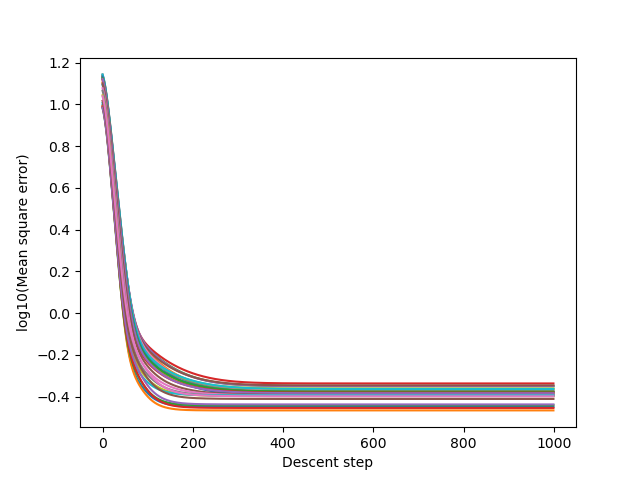

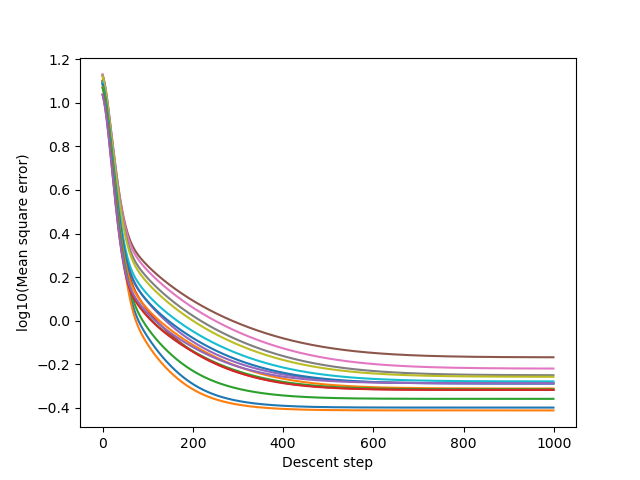

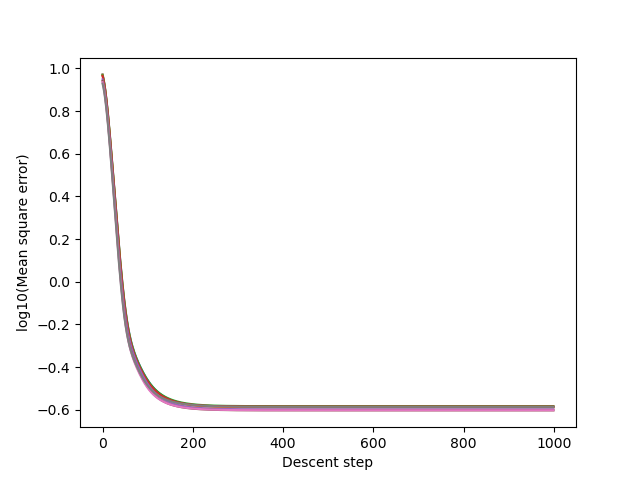

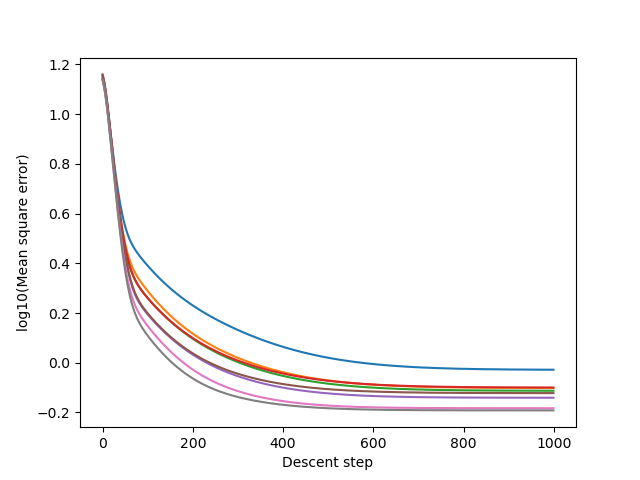

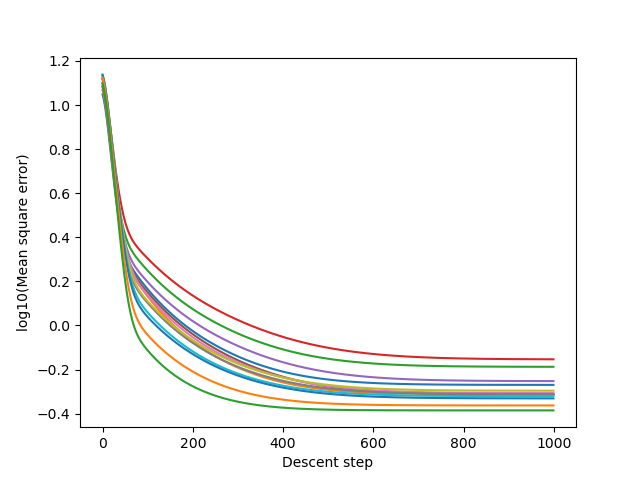

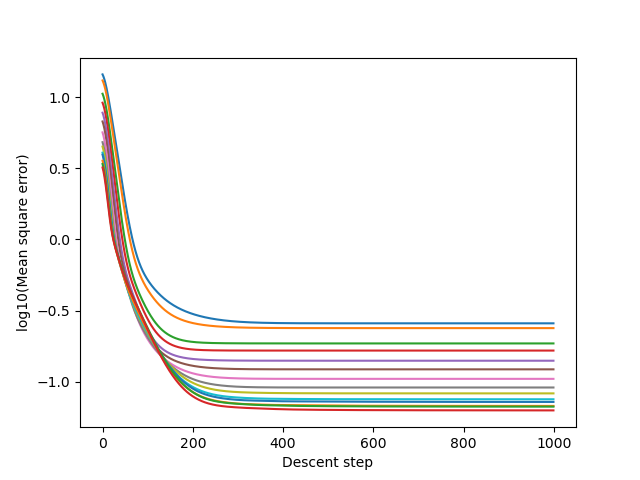

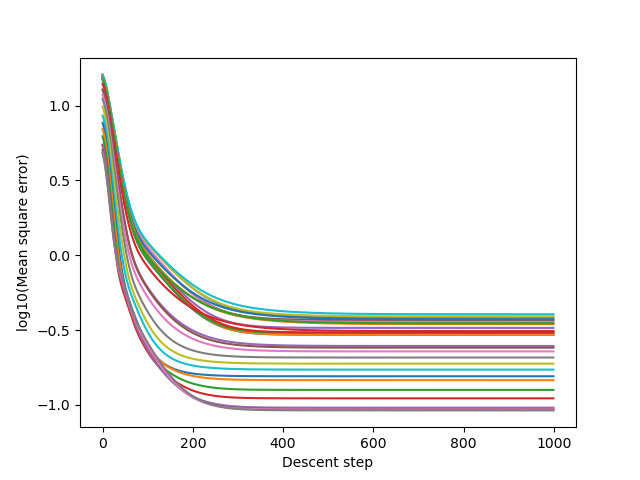

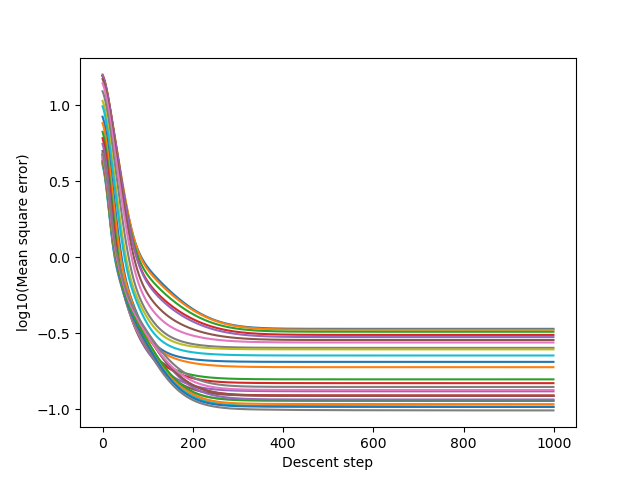

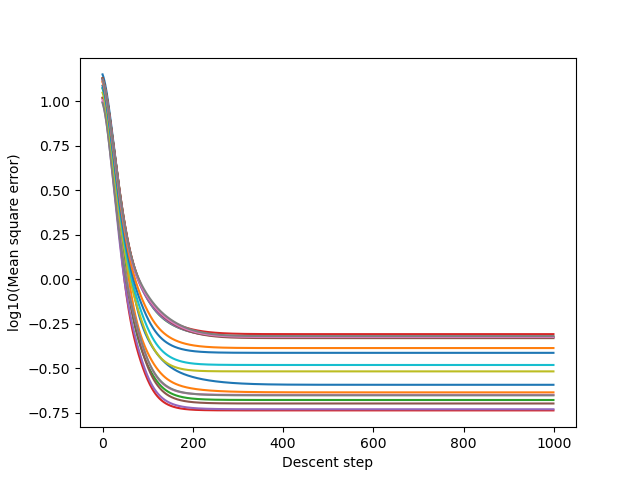

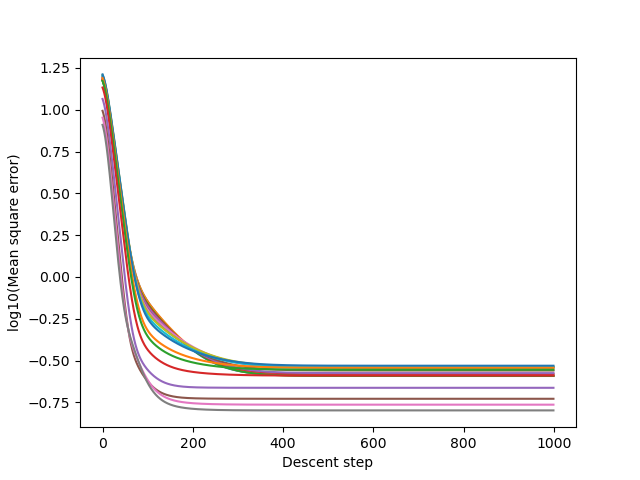

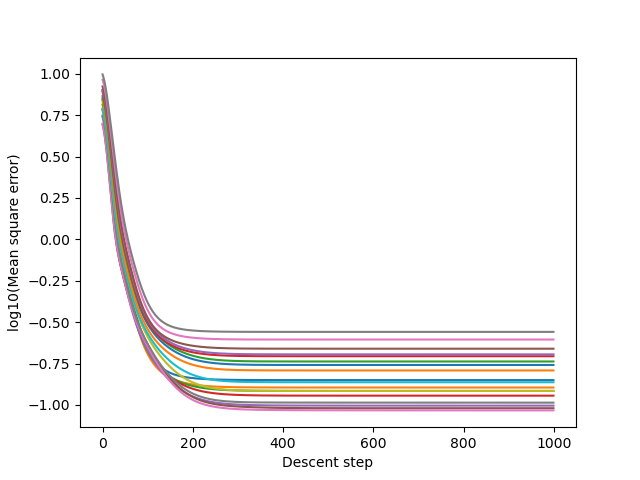

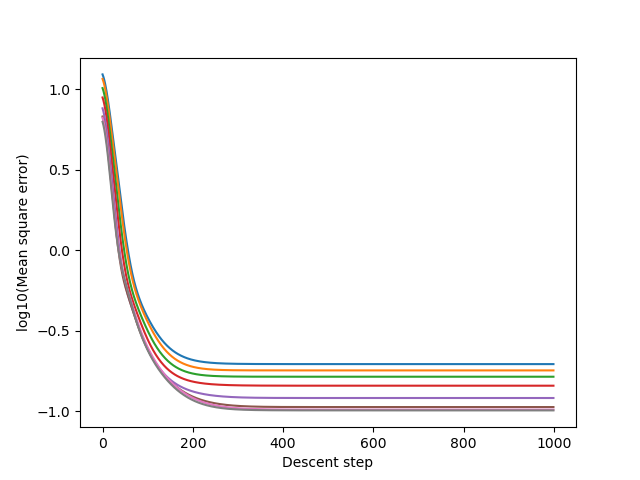

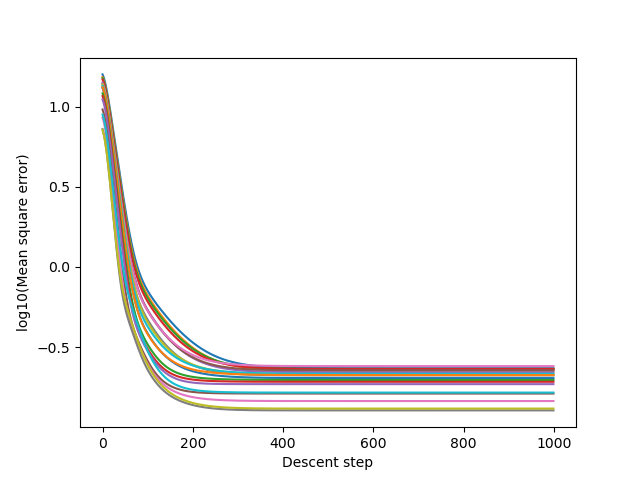

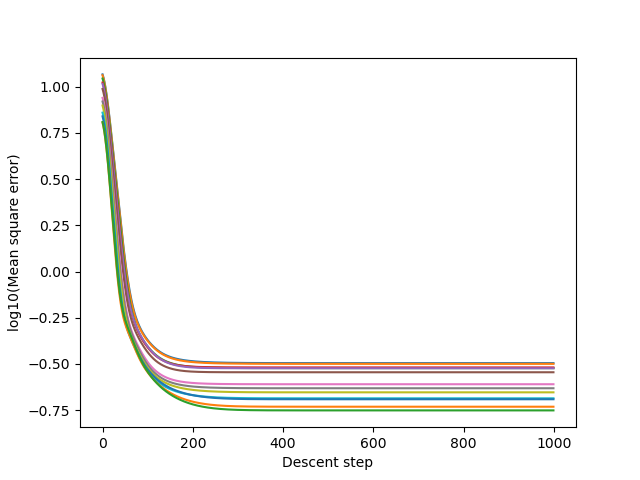

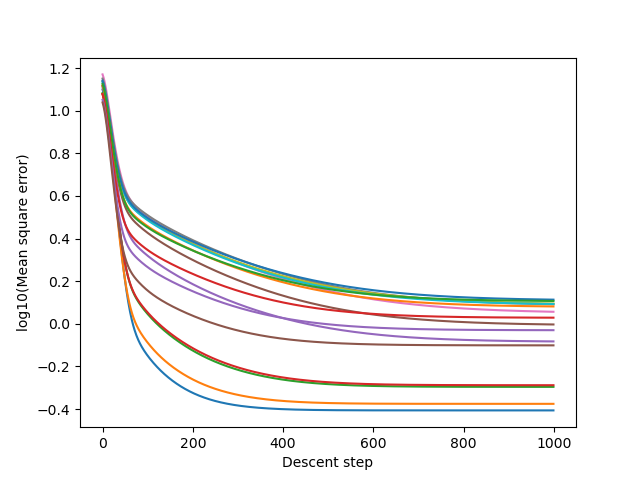

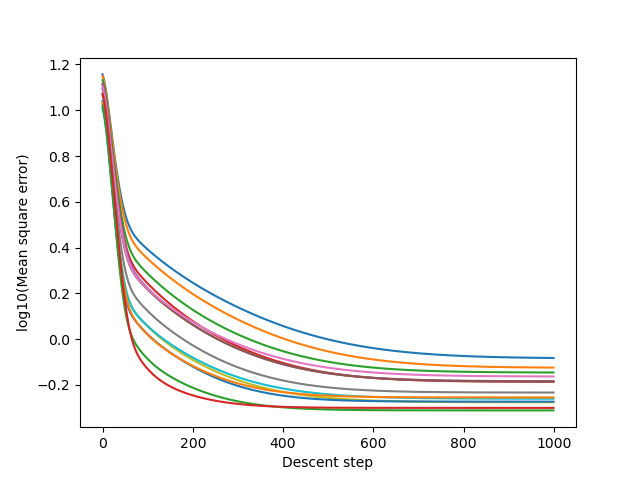

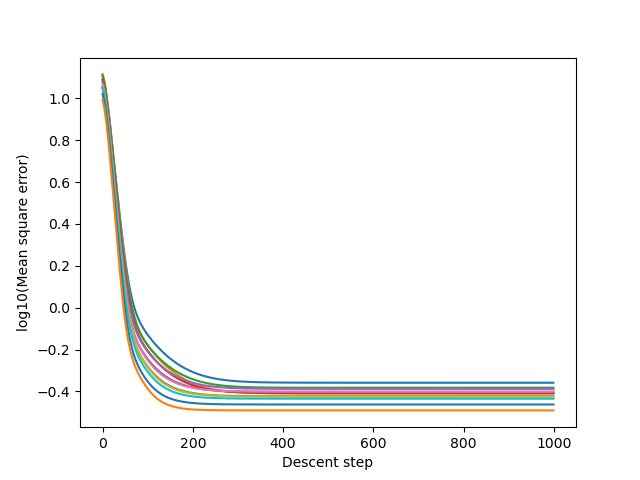

In [6]:
df = pd.read_csv('../../data/mlc4_embryos.csv')
df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
results = []
for index, row in df.iterrows():
    # print(row.Path)
    # print(row.EmbryoID)
    
    # Import movie
    img = load_image(row.Path + '/af_corrected.tif')
    roi = [np.loadtxt(row.Path + '/ROI_fit_%s.txt' % i) for i in range(img.shape[0])]
    
    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)
    
    # Compile results
    res = iq.compile_res(extra_columns={'Frame': np.arange(iq.nimgs)})
    res['EmbryoID'] = row.EmbryoID
    res['Membrane signal'] *= calibration_factor
    res = res.astype({'Frame': int})
    results.append(res)

### Combine dataframes

In [7]:
results_full = pd.concat(results)
results_full.to_csv('../../data/mlc4_quantification.csv')

### Filter out polar body

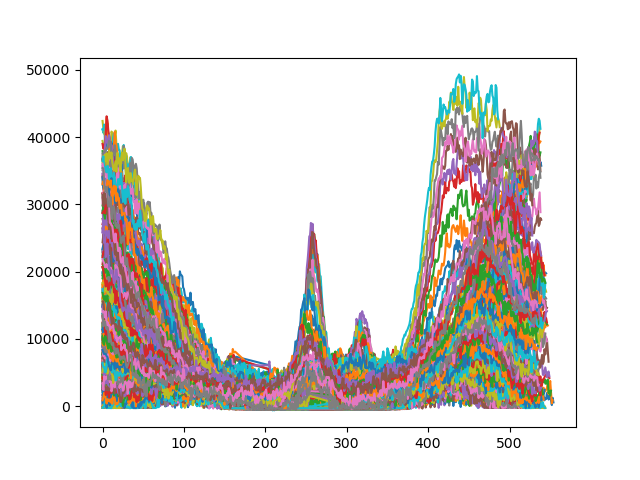

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
results_full = pd.read_csv('../../data/mlc4_quantification.csv')
res_grouped = results_full.groupby(['EmbryoID', 'Frame'])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]['Path'].values[0]
    roi = np.loadtxt(path + '/ROI_fit_%s.txt' % g[1])
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(path + '/polar_body.txt'):
        polar_body = np.loadtxt(path + '/polar_body.txt')
        ind = int(mems.shape[0] * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-20:ind+20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    results_full.loc[_mems.index, 'Membrane signal'] = mems
results_full.to_csv('../../data/mlc4_quantification_no_pb.csv')